In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from operator import attrgetter
from scipy.stats import iqr
import datetime

pd.set_option('display.max_columns',None)

---
# **Project Background**

## ***Data Source***

In [93]:
df = pd.read_csv('Supermarket Customers.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## ***Data Summary***

    Pada data terdapat informasi mengenai:
    1) Customer Data: Tahun Lahir, Latar Belakang Pendidikan, Status Pernikahan, Gaji, Jumlah Anak, Jumlah Remaja, Tanggal Transaksi Pertama Customer
    2) Product: Qty Sold produk Wine, Fruits, Meat, Fish, Sweets, dan Gold
    3) Channel: Order di Website, Store, dan Catalog
    4) Promotion: Jumlah order dengan Diskon, Keterangan Order Campaign 1 - Campaign 6 

---
# **Project Goals**

- Judul Project: ***"Customer Profiling & Behavior Analysis for Effective Marketing Strategy of a Supermarket"***
- Tujuan analisa data: ***"Menentukan segmen konsumen paling tepat untuk membuat strategi dan marketing plan yang memiliki impact signifikan terhadap penjualan, growth, dan ROI yang baik"***
- Hal yang di analisa: Customer Demography, Business & Segment Relationship, Product Preference Analysis, Channel Preference Analysis, Promotion Response Analysis, dan Customer Retention Analysis (Tenure, CLV, dan  Churn Rate)
- Hasil analisa: Beberapa marketing strategy berdasarkan perilaku dan profil konsumen

---
# **Data Cleaning**

    Tahap ini merupakan cleaning awal dengan melakukan pengecekkan dan pembersihan atas data yang ada di dataframe source agar tidak mempengaruhi hasil analisa dan menimbulkan keambiguan. Selain itu, dilakukan juga penambahan kolom untuk beberapa interpretasi karakteristik customer agar lebih mudah dianalisa. 
    
    Cleaning data yang dilakukan adalah mencari nilai duplikat dan kosong, memperbaiki format tanggal, menghitung dan mengkategorikan umur customer, memperbaiki data latar belakang pendidikan, mengkategorikan status pernikahan, menghitung jumlah anggota keluarga customer, melengkapi dan mengkategorikan nilai gaji customer.


## ***Duplicated & Missing Values***

    Pada tahap ini dilakukan pengecekkan apakah ada data yang duplicate dan ada data yang kosong pada dataframe source.

In [94]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [95]:
display(df.duplicated().sum(),df.columns[df.isna().sum() > 0])

0

Index(['Income'], dtype='object')

    Hasil menunjukkan tidak ada data duplicate value pada data frame. Tetapi ada data kosong pada kolom 'Income' yang perlu dilakukan proses cleaning.

## ***Date Time Re-Formatting*** 

    1) Agar mencegah adanya kesalahan interpretasi format tanggal DD-MM-YYYY, maka perlu dilakukan cleaning pada kolom.
    2) Pada tahap ini, kolom 'Dt_Customer' pada dataframe source disamakan terlebih dahulu urutan format tanggal nya dengan cara di split.
    3) Setelah di split kemudian di gabungkan kembali, baru diubah ke format YYYY-MM-DD.

In [96]:
date_components = df['Dt_Customer'].str.split('-', expand=True)

date_components['Dt_Cust'] = date_components[2]+'-'+date_components[1]+'-'+date_components[0]

df['Dt_Customer'] = date_components['Dt_Cust']

df = df.rename(columns={'Dt_Customer':'First Transaction'})

df['First Transaction'] = pd.to_datetime(df['First Transaction'])

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,First Transaction,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## ***Calculating Customer Age*** 

    1) Untuk mencari umur customer, maka perlu diketahui tahun pengambilan data. 
    2) Tahun pengambilan data dapat diperkirakan dengan mencari customer yang melakukan transaksi paling terakhir sebelum tanggal pengambilan data. 
    3) Dengan menggunakan 'recency' customer tersebut (sudah berapa lama customer tersebut tidak membeli produk), maka dapat ditentukan perkiraan tanggal pengambilan data.
    4) Setelah mengetahui tanggal dan tahun pengambilan data, maka umur customer dapat dihitung dengan mengurangi tahun pengambilan data dengan tahun lahir customer.

In [97]:
newest_customer = df.sort_values(by='First Transaction',ascending=False).head(1)['First Transaction'][df['First Transaction'].idxmax()]

newest_customer_recency = df.sort_values(by='First Transaction',ascending=False).head(1)['Recency'][df['First Transaction'].idxmax()]

last_updated_date = newest_customer + pd.Timedelta(days=newest_customer_recency)

last_updated_year = last_updated_date.year

df.insert(loc=2,column='Age',value=last_updated_year-df['Year_Birth'])

# melakukan pengecekan data umur yang sudah dibuat
pd.DataFrame(df['Age'].describe()[['count','min','max']])

,Age
count,2240.0
min,18.0
max,121.0


    Berdasarkan deskripsi hasil perhitungan, umur customer tertua dari data yang diperoleh adalah 121 tahun. Kemungkinan ada nya customer yang hidup hingga lebih dari 100 tahun sangat kecil, maka data ini tergolong sebagai anomali. Karena jumlah customer dengan umur yang tergolong anomali sedikit, maka pada analisa kali ini data customer tersebut dihapus.

In [98]:
df = df.drop(df[df['Age'] > 100].index)

# summary data umur customer terbaru setelah anomali dihapus
pd.DataFrame(df['Age'].describe()[['count','min','max']])

,Age
count,2237.0
min,18.0
max,74.0


    Untuk mempermudah proses interpretasi dan visualisasi, maka customer dikelompokkan berdasarkan Age Group. Hal ini dilakukan dengan membuat fungsi pengelompokkan dan menambahkan kolom baru untuk Age Group

In [99]:
def age(x):
    if 20<=x<=29:
        return '20s'
    elif 30<=x<=39:
        return '30s'
    elif 40<=x<=49:
        return '40s'
    elif 50<=x<=59:
        return '50s'
    elif 60<=x<=69:
        return '60s'
    elif 70<=x<=79:
        return '70s'
    elif 10<=x<=19:
        return '18s'
    else:
        return '>80'

df.insert(loc=3,column='Age Group',value=df['Age'].apply(age))

# summary dataframe yang sudah dikelompokkan berdasarkan Age Group
pd.DataFrame(df['Age Group'].value_counts()).sort_index()

,Age Group
18s,7
20s,214
30s,557
40s,676
50s,467
60s,300
70s,16


## ***Correcting Customer Education***

    1) Pada data Education, terdapat data yang dapat dikelompokkan menjadi satu kelompok yang sama
    2) Education level '2n Cycle' merupakan Education level yang sama dengan 'Master'
    3) Maka dari itu, pada analisis ini value '2n Cycle' diubah menjadi 'Master'

In [100]:
# melakukan pengecekkan data customer Education sebelum cleaning
pd.DataFrame(df['Education'].value_counts())

,Education
Graduation,1127
PhD,485
Master,370
2n Cycle,201
Basic,54


In [101]:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master'


# summary dataframe yang Education nya sudah diperbaharui
pd.DataFrame(df['Education'].value_counts())

,Education
Graduation,1127
Master,571
PhD,485
Basic,54


## ***Categorizing Marital Status***

    1) Status pernikahan customer (cerai/pasangan meninggal) tidak memiliki peran signifikan terhadap bisnis dan kategori produk yang dijual.
    2) Maka dari itu, pengelompokkan customer hanya dilakukan berdasarkan apakah customer memiliki pasangan atau tidak.
    3) Status customer yang status nya tidak memiliki pasangan diubah menjadi "No Partner".
    4) Status customer yang status nya memiliki pasangan diubah menjadi "With Partner"

In [102]:
# melakukan pengecekkan data Marital_Status sebelum cleaning
pd.DataFrame(df['Marital_Status'].value_counts())

,Marital_Status
Married,864
Together,579
Single,479
Divorced,231
Widow,77
Alone,3
Absurd,2
YOLO,2


In [103]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO', 'Single', 'Divorced', 'Widow'], 'No Partner')

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'With Partner')

df = df.rename(columns={'Marital_Status':'Marital Status'})

# summary dataframe yang Marital Status nya sudah diperbaharui
pd.DataFrame(df['Marital Status'].value_counts())


,Marital Status
With Partner,1443
No Partner,794


## ***Calculating Household Members***

    1) Untuk menghitung banyak anggota keluarga seorang customer, perlu pengelompokkan atas customer yang memiliki pasangan atau tidak
    2) Maka dari itu, dilakukan penambahan kolom 'Marriage Count', dimana customer yang memiliki pasangan terhitung sebagai 2 anggota keluarga, sedangkan untuk customer yang tidak memiliki pasangan terhitung sebagai 1 anggota keluarga
    3) Dikarenakan jenis produk yang di jual di Supermarket bukan produk untuk kebutuhan khusus atau kategori umur khusus (seperti popok bayi, seragam sekolah), maka anggota keluarga baik anak maupun remaja tidak perlu memiliki kategori sendiri dan bisa dianggap satu kesatuan sebagai anggota keluarga 
    4) Untuk menghitung total anggota keluarga, maka dilakukan penjumlahan terhadap Marriage Count, jumlah anak, dan jumlah remaja

In [104]:
df.insert(loc=9,column='Marriage Count',value=np.where(df['Marital Status']=='With Partner',2,1))

df.insert(loc=10,column='Household Members',value=(df['Marriage Count'] + df['Kidhome'] + df['Teenhome']))

# dataframe yang sudah ditambahkan kolom 'Household Members'
df.head()

,ID,Year_Birth,Age,Age Group,Education,Marital Status,Income,Kidhome,Teenhome,Marriage Count,Household Members,First Transaction,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,50s,Graduation,No Partner,58138.0,0,0,1,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,60s,Graduation,No Partner,46344.0,1,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40s,Graduation,With Partner,71613.0,0,0,2,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,30s,Graduation,With Partner,26646.0,1,0,2,3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,30s,PhD,With Partner,58293.0,1,0,2,3,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## ***Completing Income Data***

    1) Pada pengecekan awal sebelumnya, ditemukan bahwa terdapat 24 data 'Income' yang memiliki nilai kosong
    2) Berdasarkan hasil deskripsi data 'Income', data memiliki distribusi/persebaran yang tergolong tidak normal
    3) Maka dari itu, untuk melengkapi data 'Income' yang kosong, pada analisa ini digunakan median dari 'Income'
    4) Pada umum nya, gaji seseorang dipengaruhi oleh umur dan latar belakang pendidikan
    5) Sehingga, untuk median yang digunakan adalah median berdasarkan Age Group dan Education Background

In [105]:
# summary statistik dari data 'Income' customer
pd.DataFrame(df['Income'].describe())

,Income
count,2213.000000
mean,52236.581563
std,25178.603047
min,1730.000000
25%,35246.000000
50%,51373.000000
75%,68487.000000
max,666666.000000


In [106]:
df['Income'] = df.groupby(['Age Group','Education'])['Income'].apply(lambda x: x.fillna(x.median()))

# summary statistik dari data 'Income' customer yang sudah dilengkapi
pd.DataFrame(df['Income'].describe())

,Income
count,2237.000000
mean,52235.873268
std,25054.421061
min,1730.000000
25%,35523.000000
50%,51390.000000
75%,68316.000000
max,666666.000000


    Pada data 'Income' nilai maximal yang tercatat adalah 666666. Angka ini kemungkinan besar merupakan kesalahan input, maka data tersebut data dapat dihapus

In [107]:
df = df[~(df['Income']==666666)]

# summary statistik dari data 'Income' customer yang sudah dilengkapi
pd.DataFrame(df['Income'].describe())

,Income
count,2236.000000
mean,51961.083408
std,21424.626498
min,1730.000000
25%,35502.500000
50%,51381.500000
75%,68289.750000
max,162397.000000


## ***Categorizing Income Group***

    1) Pada tahap ini dilakukan penambahan kolom yang berisikan kategori berdasarkan nilai gaji seorang customer untuk mempermudah profiling karakteristik customer tersebut
    2) Hal ini dilakukan dengan menerapkan sebuah fungsi yang dibuat kepada data yang ada di kolom 'Income'.
    3) Kategori Income dilakukan dengan perbedaan range gaji 25,000

In [108]:
def income_group(x):
    if 0<=x<=25000:
        return '''Class I\n(<25K)'''
    elif 25000<=x<=50000:
        return '''Class II\n(25K-50K)'''
    elif 50000<=x<=75000:
        return '''Class III\n(50K-75K)'''
    elif 75000<=x<=100000:
        return '''Class IV\n(75K-100K)'''
    elif x>=100000:
        return '''Class V\n(>100K)'''
    else:
        return 'Unknown'
    
df.insert(loc=7,column='Income Group',value=(df['Income'].apply(income_group)))

# summary dataframe yang sudah dikelompokkan berdasarkan Income Group
pd.DataFrame(df['Income Group'].value_counts()).sort_index()

,Income Group
Class I\n(<25K),242
Class II\n(25K-50K),826
Class III\n(50K-75K),811
Class IV\n(75K-100K),345
Class V\n(>100K),12


---
# **Customer Demographic**

    Customer Demographic digunakan untuk mengelompokkan jumlah customer berdasarkan data demografis yang tersedia. Pada data ini diperoleh beberapa demografis customer yaitu umur, latar belakang pendidikan, rentang gaji, status pernikahan, dan jumlah anggota keluarga.

## ***Data Preparation***

    Pada tahap ini dilakukan pembuatan dataframe berdasarkan grouping kolom 'Age Group','Education','Income Group','Marital Status','Household Members' untuk mengetahui jumlah customer tiap demografis nya.

In [109]:
df_segment = df.groupby(
    ['Age Group','Education','Income Group','Marital Status','Household Members']).nunique()[['ID']].reset_index().rename(
    columns={'ID':'Total Customer'})

df_segment.head()

,Age Group,Education,Income Group,Marital Status,Household Members,Total Customer
0,18s,Basic,Class I\n(<25K),With Partner,2,1
1,18s,Graduation,Class II\n(25K-50K),No Partner,1,2
2,18s,Graduation,Class III\n(50K-75K),No Partner,1,1
3,18s,Master,Class I\n(<25K),With Partner,2,1
4,18s,Master,Class IV\n(75K-100K),No Partner,1,2


## ***Customer Segment Visualization***

    Proses visualisasi digunakan dengan melakukan for loop untuk membuat grafik jumlah customer berdasarkan tiap demografis nya. Grafik yang digunakan adalah stacked bar plot untuk mempermudah interpretasi.

''

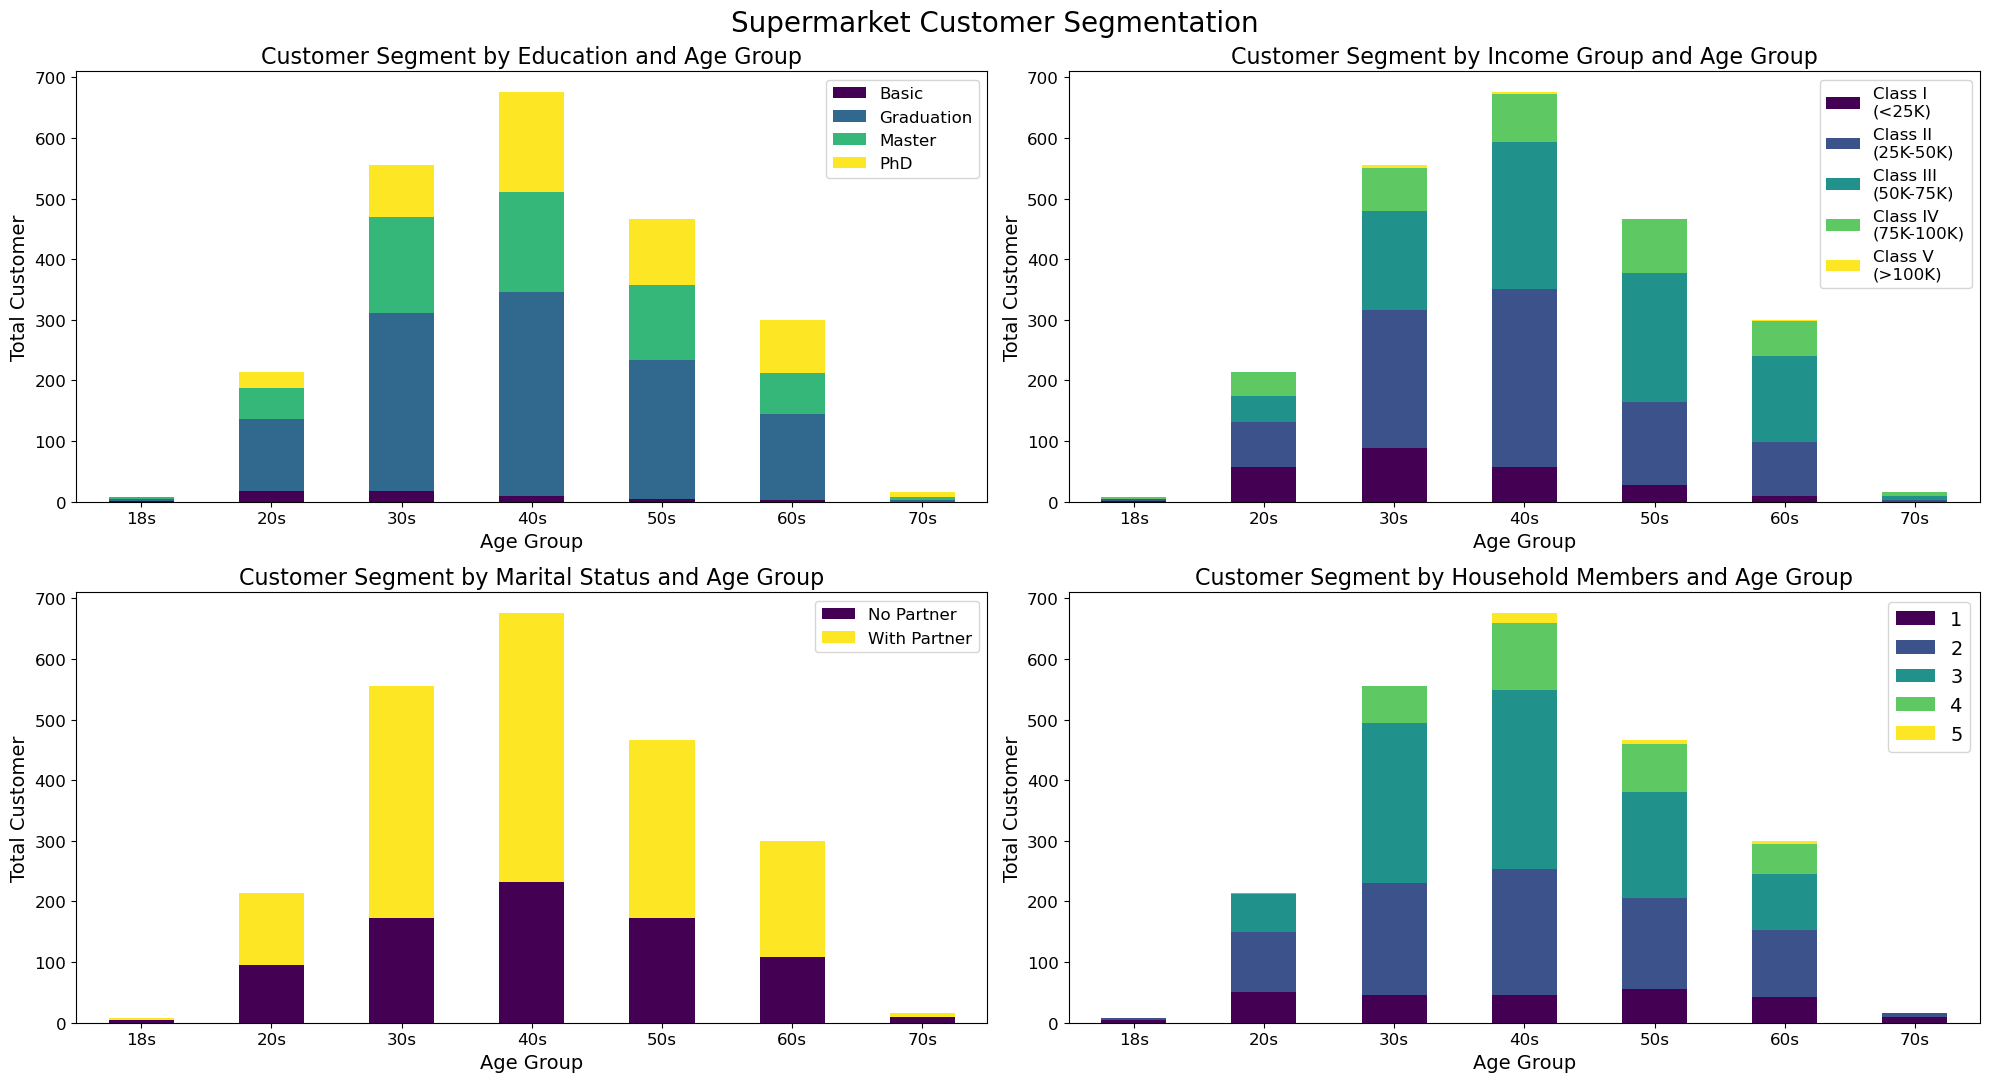

In [110]:
plt.figure(figsize=(20,11))

for kolom in range(len(df_segment.columns)-2):

    ax = plt.subplot(2,2, kolom+1)

    df_plot = pd.pivot_table(
        data=df_segment,
        index='Age Group',
        columns=df_segment.columns[kolom+1],
        values='Total Customer',
        aggfunc=np.sum)
    df_plot.plot(kind='bar', stacked=True, ax=ax,colormap='viridis')
    
    plt.title(f"Customer Segment by {df_segment.columns[kolom+1]} and Age Group",fontsize=16)
    plt.xticks(rotation=0,fontsize=12)
    plt.xlabel('Age Group',fontsize=14)
    plt.yticks(fontsize=12)
    plt.ylabel('Total Customer',fontsize=14)
    plt.legend(fontsize=12)

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.legend(fontsize=14)
plt.suptitle("Supermarket Customer Segmentation", fontsize=20)
plt.tight_layout()
;


## ***Customer Segmentation Summary***

    1) Customer yang pernah berbelanja di Supermarket paling banyak memiliki rentang umur 40-49 tahun (40s) dan 30-39 tahun (30s).
    2) Customer yang pernah berbelanja di Supermarket paling banyak memiliki latar belakang pendidikan Graduation dan Master.
    3) Customer yang pernah berbelanja di Supermarket paling banyak memiliki rentang gaji 25K-50K (medium-to-low income) dan 50K-75K (medium income).
    4) Customer yang pernah berbelanja di Supermarket lebih banyak memiliki pasangan dibandingkan dengan yang tidak memiliki pasangan.
    5) Customer yang pernah berbelanja di Supermarket paling banyak memiliki anggota keluarga 3 orang dan 2 orang tanggungan.

---
# **Business & Segment Relationship**
    
    Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi hubungan antara karakteristik customer dengan performa bisnis. Hal ini juga dapat menunjukkan karakteristik customer mana yang sangat mempengaruhi bisnis, dan mana yang tidak memiliki pengaruh terhadap bisnis.

## ***Data Preparation***

    Pada tahap ini dilakukan pembuatan dataframe baru dengan menggabungkan Qty Sold tiap kategori produk menjadi satu dataframe. Karena pada source dataframe penjualan produk terpisah pada kolom masing-masing, maka pada bagian ini kolom-kolom penjualan produk ditumpuk ke bawah (menjadi baris) agar mempermudah proses analisa dan visualisasi.
    

In [111]:
# membuat dataframe bernama columns_df untuk membantu pemilihan kolom
columns_df = pd.DataFrame(df.columns, columns=['Column']).transpose()
columns_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
Column,ID,Year_Birth,Age,Age Group,Education,Marital Status,Income,Income Group,Kidhome,Teenhome,Marriage Count,Household Members,First Transaction,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [112]:
def product_data_unstacking(df):

    products = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']    
    
    product_cols = list(range(14, 20, 1))                               
    
    dfs = {}

    for i, product in enumerate(products):

        cols = list(range(14)) + [product_cols[i]]

        dfs[product] = df.iloc[:, cols].rename(columns={df.columns[product_cols[i]]: 'Qty Sold'})   

        dfs[product]['Category'] = product

    df_products = pd.concat(dfs.values(), axis=0)                       
    return df_products

df_products = product_data_unstacking(df)

# dataframe yang jumlah pembelian produk dan kategori produk nya sudah dijadikan baris
df_products.head()

,ID,Year_Birth,Age,Age Group,Education,Marital Status,Income,Income Group,Kidhome,Teenhome,Marriage Count,Household Members,First Transaction,Recency,Qty Sold,Category
0,5524,1957,57,50s,Graduation,No Partner,58138.0,Class III\n(50K-75K),0,0,1,1,2012-09-04,58,635,Wines
1,2174,1954,60,60s,Graduation,No Partner,46344.0,Class II\n(25K-50K),1,1,1,3,2014-03-08,38,11,Wines
2,4141,1965,49,40s,Graduation,With Partner,71613.0,Class III\n(50K-75K),0,0,2,2,2013-08-21,26,426,Wines
3,6182,1984,30,30s,Graduation,With Partner,26646.0,Class II\n(25K-50K),1,0,2,3,2014-02-10,26,11,Wines
4,5324,1981,33,30s,PhD,With Partner,58293.0,Class III\n(50K-75K),1,0,2,3,2014-01-19,94,173,Wines


    Data yang tersedia saat ini hanyalah jumlah produk yang dibeli oleh customer selama 2 tahun kebelakang. Akan tetapi, belum diketahui berapa kali customer tersebut melakukan order di supermarket ini. Maka dari itu, perlu dihitung banyaknya order (berapa kali customer tersebut melakukan purchase) untuk setiap kategori produk. Banyaknya order dapat diperkirakan dengan membagi jumlah produk yang customer beli dengan median qty terjual per kategori produk.

In [113]:
avg_order = df_products.groupby('Category').median()[['Qty Sold']]

def order(x):
    if x in avg_order.index:
        return avg_order.loc[x, 'Qty Sold']
    else:
        return 'Unknown'

df_products['Category Qty Sold'] = df_products['Category'].apply(order)

df_products['Total Order'] = ((df_products['Qty Sold'] / df_products['Category Qty Sold']).round(0).clip(lower=1)).astype(int)

df_sales = df_products[['ID','Education','Age','Age Group','Income Group','Marital Status','Household Members','Qty Sold','Total Order','Category']]

df_sales.head()

,ID,Education,Age,Age Group,Income Group,Marital Status,Household Members,Qty Sold,Total Order,Category
0,5524,Graduation,57,50s,Class III\n(50K-75K),No Partner,1,635,4,Wines
1,2174,Graduation,60,60s,Class II\n(25K-50K),No Partner,3,11,1,Wines
2,4141,Graduation,49,40s,Class III\n(50K-75K),With Partner,2,426,2,Wines
3,6182,Graduation,30,30s,Class II\n(25K-50K),With Partner,3,11,1,Wines
4,5324,PhD,33,30s,Class III\n(50K-75K),With Partner,3,173,1,Wines


    Untuk mengetahui hubungan antara latar belakang pendidikan dan gaji customer terhadap performa bisnis, maka keduanya perlu di ranking sebelum divisualisasikan. Skala yang digunakan adalah skala angka, dimana semakin tinggi rank nya, semakin besar level pendidikan dan rentang gaji.

In [114]:
df_corr = df_sales.copy()

df_corr.insert(2, 'Education Level', df_corr['Education'].map({
    'Basic': 1, 
    'Graduation': 2, 
    'Master': 3, 
    'PhD': 4}))

df_corr.insert(6, 'Income Rank', df_corr['Income Group'].map({
    '''Class I\n(<25K)''': 1,
    '''Class II\n(25K-50K)''': 2,
    '''Class III\n(50K-75K)''': 3,
    '''Class IV\n(75K-100K)''': 4,
    '''Class V\n(>100K)''': 5}))

df_corr.head()

,ID,Education,Education Level,Age,Age Group,Income Group,Income Rank,Marital Status,Household Members,Qty Sold,Total Order,Category
0,5524,Graduation,2,57,50s,Class III\n(50K-75K),3,No Partner,1,635,4,Wines
1,2174,Graduation,2,60,60s,Class II\n(25K-50K),2,No Partner,3,11,1,Wines
2,4141,Graduation,2,49,40s,Class III\n(50K-75K),3,With Partner,2,426,2,Wines
3,6182,Graduation,2,30,30s,Class II\n(25K-50K),2,With Partner,3,11,1,Wines
4,5324,PhD,4,33,30s,Class III\n(50K-75K),3,With Partner,3,173,1,Wines


## ***Segmentation Relationship Visualization***

    Proses visualisasi dilakukan menggunakan heat map karena lebih mudah untuk diinterpretasi hubungan antara tiap karakteristik customer dengan total qty sold.

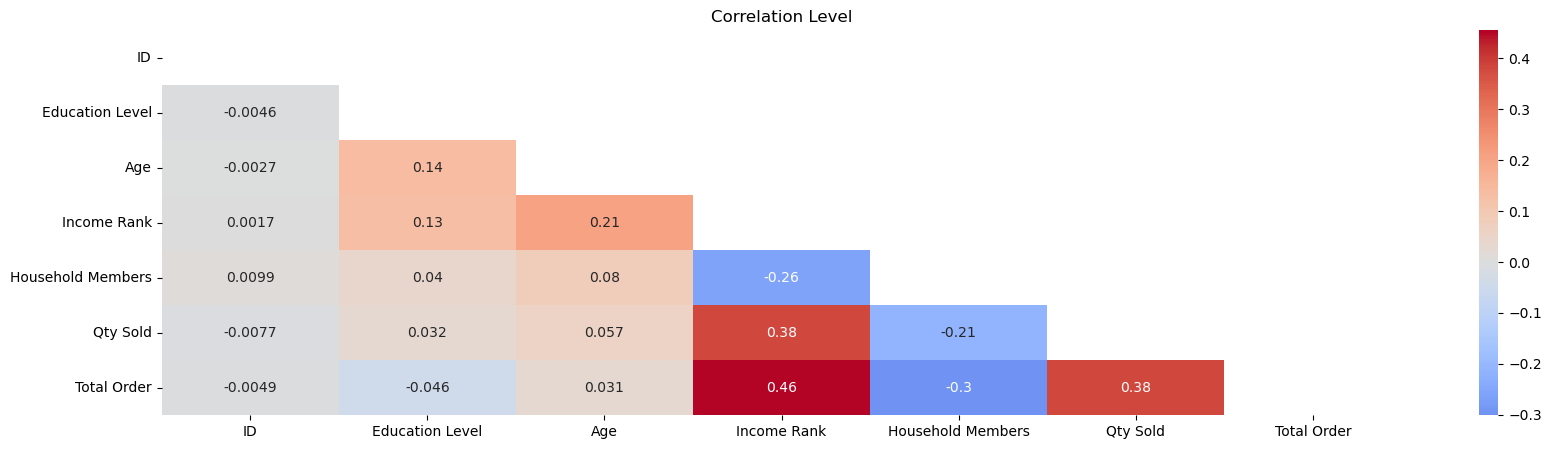

In [115]:
plt.figure(figsize=(20,5))
matrix = np.triu(df_corr.corr())
sns.heatmap(
    data=df_corr.corr(),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix
)
plt.title('Correlation Level')
plt.show()

## ***Segmentation Relationship Summmary***

    1) Qty Sold sebuah produk berhubungan lurus dan cukup kuat (medium correlation) dengan Income Rank. Artinya, ada kecenderungan bahwa semakin tinggi rentang gaji seorang customer, semakin banyak juga produk yang dibeli.

    2) Qty Sold sebuah produk berhubungan lurus tetapi tidak kuat (low correlation) dengan Age dan Education Level. Artinya, semakin tua umur customer dan semakin tinggi latar belakang pendidikan customer tersebut, hanya ada sedikit kecenderungan semakin banyak juga produk yang dibeli.

    3) Qty Sold sebuah produk berhubungan terbalik dan cukup kuat (medium correlation) dengan Household Members. Artinya, ada kecenderungan bahwa semakin banyak anggota keluarga seorang customer, semakin sedikit produk yang dibeli.

---
# **Product Preference Analysis**
    Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi jenis produk yang cenderung dibeli oleh customer berdasarkan demografis nya atau karakteristik customer tersebut.


## ***Data Preparation***

    Pada tahap ini dilakukan pemilihan karakteristik customer yang digunakan untuk mengetahui kecenderungan produk yang dibeli. Karakteristik yang digunakan ada pada kolom 'Age Group', 'Education', 'Income Group', 'Marital Status', 'Household Members', 'Qty Sold', 'Category'.

In [116]:
def pivot_percentage(df):
    df = (df.div(df['All'], axis=0) * 100).round(2)
    df = df.iloc[:-1, :-1]
    return df

df_graph_sales = df_sales[['Age Group', 'Education', 'Income Group', 'Marital Status', 'Household Members', 'Qty Sold', 'Category']].copy()

df_graph_sales.head()


,Age Group,Education,Income Group,Marital Status,Household Members,Qty Sold,Category
0,50s,Graduation,Class III\n(50K-75K),No Partner,1,635,Wines
1,60s,Graduation,Class II\n(25K-50K),No Partner,3,11,Wines
2,40s,Graduation,Class III\n(50K-75K),With Partner,2,426,Wines
3,30s,Graduation,Class II\n(25K-50K),With Partner,3,11,Wines
4,30s,PhD,Class III\n(50K-75K),With Partner,3,173,Wines


## ***Product Preference Visualization***

    1) Proses visualisasi dilakukan menggunakan stacked bar plot karena lebih mudah untuk diinterpretasi hubungan antara tiap customer demografis nya terhadap kecenderungan produk yang dibeli.
    2) Perhitungan kecenderungan produk yang dibeli diperoleh berdasarkan persentase jumlah produk yang dibeli untuk setiap kategori produk berdasarkan customer demografis nya.

''

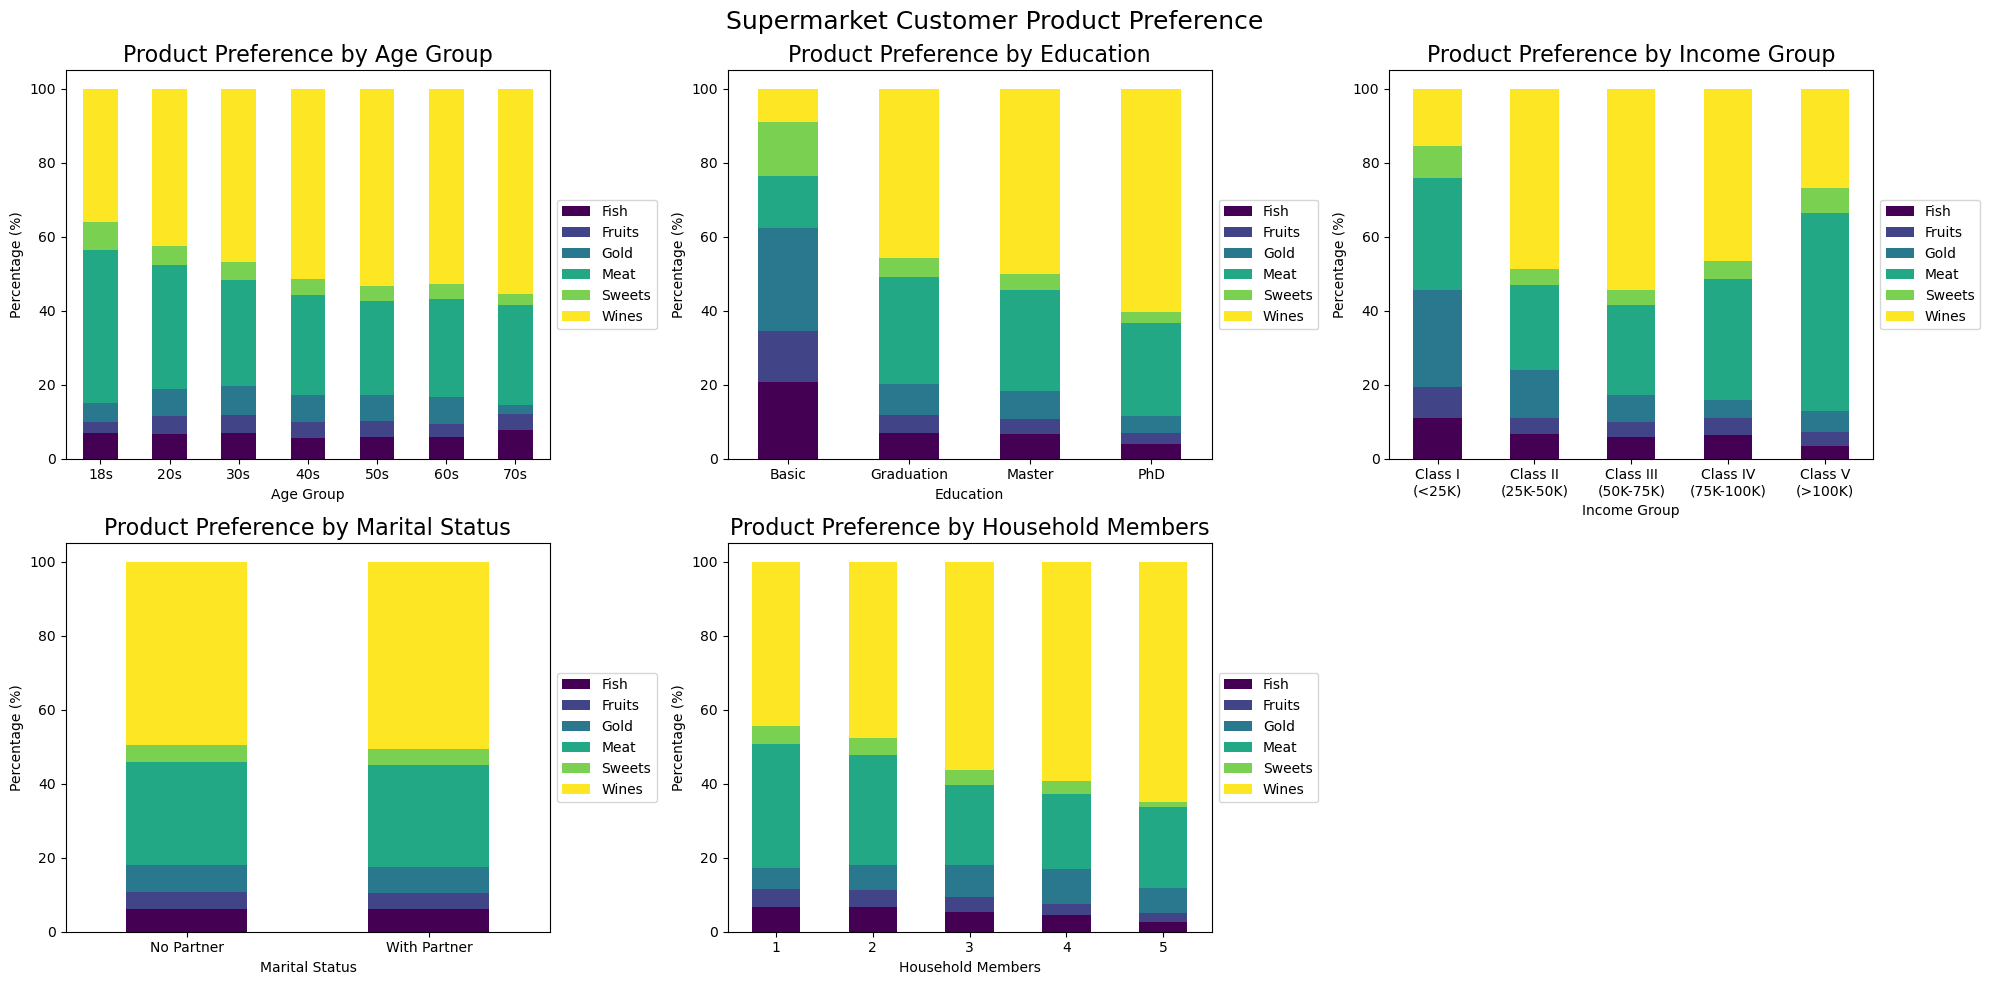

In [117]:
plt.figure(figsize=(20,10))

for kolom in range(len(df_graph_sales.columns)-2):
    ax = plt.subplot(2,3, kolom+1)

    pivot_plot = pd.pivot_table(
    data=df_sales,
    index = df_graph_sales.columns[kolom],
    columns= 'Category',
    values='Qty Sold',
    aggfunc=np.sum,
    margins=True)

    pivot_plot_percent = pivot_percentage(pivot_plot)

    pivot_plot_percent.plot(kind='bar', stacked=True, ax=ax,colormap='viridis')

    plt.title(f"Product Preference by {df_graph_sales.columns[kolom]}",fontsize=16)
    plt.xticks(rotation=0)
    plt.ylabel('Percentage (%)')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Supermarket Customer Product Preference", fontsize=18)
plt.tight_layout()
;

## ***Product Preference Summary***

**Preferensi Produk berdasarkan Umur**

    1) Pada seluruh kategori umur customer, kecenderungan pembelian produk yang paling tinggi adalah pembelian produk Wine dan Meat.
    2) Selain kedua produk itu, kecenderungan pembelian lainnya adalah untuk produk Fish dan Gold. Akan tetapi, tiap kategori umur customer memiliki preferensi yang berbeda.
    3) Kecenderungan pembelian produk Wine semakin meningkat ketika rentang umur customer juga meningkat (customer semakin tua).
    4) Kecenderungan pembelian produk Meat semakin menurun ketika rentang umur customer meningkat (customer semakin tua).
    5) Kecenderungan pembelian produk Fish paling tinggi berada pada customer berumur 70-79 tahun
    6) Kecenderungan pembelian produk Gold paling tinggi berada pada customer berumur 30-39 tahun

**Preferensi Produk berdasarkan Latar Belakang Pendidikan**

    1) Pada seluruh jenis latar belakang pendidikan customer, kecuali Basic, kecenderungan pembelian produk yang paling tinggi adalah pembelian produk Wine dan Meat.
    2) Pada customer dengan latar belakangan pendidikan Basic, kecenderungan produk yang dibeli adalah produk Gold dan Fish.
    3) Kecenderungan pembelian produk Wine semakin meningkat ketika latar belakang pendidikan customer semakin tinggi.

**Preferensi Produk berdasarkan Income Group**

    1) Customer dengan rentang gaji 25K hingga 100K (Class II, Class III, Class IV) memiliki kecenderungan pembelian produk yang sama, yaitu produk Wine. Akan tetapi, kecenderungan pembelian Wine paling tinggi ada pada Class III (50K-75K).
    2) Customer dengan rentang gaji dibawah 25K (Class I) dan diatas 100K (Class V) memiliki kecenderungan pembelian produk yang sama, yaitu produk Meat. Akan tetapi, kecenderungan pembelian Meat lebih tinggi pada Class V.

**Preferensi Produk berdasarkan Marital Status**

    1) Kecenderungan pembelian produk pada customer With Partner dan No Partner memiliki pola yang sama, yaitu cenderung membeli produk Wine dan Meat.

**Preferensi Produk berdasarkan Household Members**

    1) Pada seluruh kategori jumlah anggota keluarga customer, kecenderungan pembelian produk yang paling tinggi adalah pembelian produk Wine dan Meat.
    2) Semakin banyak anggota keluarga dan tanggungan seorang customer, kecenderungan pembelian produk Wine semakin meningkat 
    3) Semakin banyak anggota keluarga dan tanggungan seorang customer, kecenderungan pembelian produk Meat semakin menurun

## ***Customer Basket Size***

    Basket Size merupakan banyaknya produk yang dibeli dalam 1x pembelian (1 order/1 purchase). Pada bagian ini, dilakukan perhitungan Customer Basket Size berdasarkan produk yang dibeli dan customer demografis nya.
    

### **Data Preparation**

    Pada bagian ini dilakukan ABS dengan membagi Qty Sold dan Total Order seorang customer. DataFrame yang sudah ada perhitungan ABS nya kemudian di export ke excel untuk digunakan sebagai data visualisasi di Tableau.

In [118]:
# membuat data untuk analisa basket size
df_abs = df_sales.copy()

# menghitung basket size dengan cara membagi berapa banyak produk dibeli customer dengan berapa banyak melakukan order
df_abs['Avg Basket Size'] = ((df_abs['Qty Sold'] / df_abs['Total Order']).round(0)).astype(int)

# menyimpan data ke csv
df_abs.to_excel('Supermarket Basket Size.xlsx',index=False)

# dataframe untuk dibuat visualisasi nya di tableu
df_abs.head()

,ID,Education,Age,Age Group,Income Group,Marital Status,Household Members,Qty Sold,Total Order,Category,Avg Basket Size
0,5524,Graduation,57,50s,Class III\n(50K-75K),No Partner,1,635,4,Wines,159
1,2174,Graduation,60,60s,Class II\n(25K-50K),No Partner,3,11,1,Wines,11
2,4141,Graduation,49,40s,Class III\n(50K-75K),With Partner,2,426,2,Wines,213
3,6182,Graduation,30,30s,Class II\n(25K-50K),With Partner,3,11,1,Wines,11
4,5324,PhD,33,30s,Class III\n(50K-75K),With Partner,3,173,1,Wines,173


### **Customer Basket Size Visualization**

Visualisasi Customer Basket Size dibuat dengan Tableau di link ini:
https://public.tableau.com/shared/D82CRT6D2?:display_count=n&:origin=viz_share_link

### **Customer Basket Size Summary**

**Berdasarkan Umur**

    1) Customer dengan umur 20 hingga 79 tahun memiliki basket size terbesar untuk pembelian produk Wine. Ada kecenderungan semakin tua umur customer, semakin besar juga basket size nya.
    2) Customer dengan umur dibawah 20 tahun memiliki basket size terbesar untuk pembelian produk Gold.
    3) Pada seluruh customer Age Group, basket size pembelian produk Meat merupakan basket size ke-2 terbesar.
    4) Customer dengan rentang umur 70-79 tahun merupakan customer Age Group dengan rata-rata total order tertinggi. Artinya, customer ini lebih sering melakukan  order dibandingkan customer Age Group lainnya.

**Berdasarkan Latar Belakang Pendidikan**

    1) Customer dengan latar belakang pendidikan Graduation, Master, dan PhD memiliki pola basket size yang sama yaitu paling tinggi pada pembelian produk Wine dan Meat.
    2) Customer dengan latar belakang pendidikan Basic memiliki basket size paling tinggi untuk pembelian produk Gold.
    3) Customer dengan latar belakang PhD paling banyak melakukan order produk Wine dibandingkan produk lainnya.
    4) Customer dengan latar belakang Graduation paling banyak melakukan order produk Sweets dibandingkan produk lainnya.
    5) Customer dengan latar belakang Basic dan Master rata-rata hanya melakukan order sebanyak 1x (tidak pernah repeat).


**Berdasarkan Income Group**

    1) Customer Income Group Class II, Class III, dan Class 4 memiliki pola basket size yang sama yaitu paling tinggi pada pembelian produk Wine dan Meat, dimana semakin tinggi nilai gaji customer, semakin tinggi juga basket size nya terhadap produk Wine dan Meat.
    2) Customer Income Group Class I memiliki basket size tertinggi pada pembelian produk Gold.
    3) Customer Income Group Class V memiliki basket size tertinggi pada pembelian produk Meat.
    4) Customer Income Group Class IV merupakan customer dengan rata-rata total order tertinggi. Artinya, customer ini lebih sering melakukan  order dibandingkan customer Income Group lainnya.

**Berdasarkan Household Members**

    1) Customer No Partner dan With Partner memiliki pola basket size yang sama yaitu paling tinggi pada pembelian produk Wine dan Meat.
    2) Semakin banyak jumlah anggota keluarga nya, semakin kecil basket size customer tersebut.
    3) Customer dengan jumlah anggota keluarga paling sedikit untuk Customer No Partner dan With Partner melakukan order lebih sering.
    4) Semakin banyak jumlah anggota keluarga nya, semakin jarang juga customer tersebut melakukan order.


---
# **Channel Preference Analysis**
    Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi dan memahami preferensi konsumen terkait saluran komunikasi dan transaksi (channel) yang dimiliki oleh Supermarket. Kecenderungan pemilihan saluran transaksi ini dikategorikan berdasarkan demografis customer.


## ***Data Preparation***

    Pada tahap ini dilakukan pembuatan dataframe baru dengan menggabungkan banyaknya purchase seorang customer di tiap channel menjadi satu dataframe. Karena pada source dataframe penjualan tiap channel terpisah pada kolom masing-masing, maka pada bagian ini kolom-kolom penjualan tiap channel ditumpuk ke bawah (menjadi baris) agar mempermudah proses analisa dan visualisasi.


In [119]:
# membuat dataframe untuk keperluan analisa channel preference
df_channel = df.copy()
df_channel = df_channel[['ID','First Transaction','Age Group','Education','Income Group','Marital Status','Household Members','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

# dataframe bantuan untuk pemilihan kolom
df_channel_columns = pd.DataFrame(df_channel.columns, columns=['Column']).transpose()
df_channel_columns


,0,1,2,3,4,5,6,7,8,9,10
Column,ID,First Transaction,Age Group,Education,Income Group,Marital Status,Household Members,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth


In [120]:
def channel_data_unstacking(df):

    channels = ['Website','Catalog','Store']    
    
    channel_cols = list(range(7,10, 1))                               
    
    dfs = {}

    for i, channel in enumerate(channels):
        cols = list(range(7)) + [channel_cols[i]]

        dfs[channel] = df.iloc[:, cols].rename(columns={df.columns[channel_cols[i]]: 'Total Purchase'})   

        dfs[channel]['Channel'] = channel

    df_channels = pd.concat(dfs.values(), axis=0)                       
    return df_channels

all_channels = channel_data_unstacking(df_channel)

all_channels.head()

,ID,First Transaction,Age Group,Education,Income Group,Marital Status,Household Members,Total Purchase,Channel
0,5524,2012-09-04,50s,Graduation,Class III\n(50K-75K),No Partner,1,8,Website
1,2174,2014-03-08,60s,Graduation,Class II\n(25K-50K),No Partner,3,1,Website
2,4141,2013-08-21,40s,Graduation,Class III\n(50K-75K),With Partner,2,8,Website
3,6182,2014-02-10,30s,Graduation,Class II\n(25K-50K),With Partner,3,2,Website
4,5324,2014-01-19,30s,PhD,Class III\n(50K-75K),With Partner,3,5,Website


## ***Channel Preference Visualization***
    1) Proses visualisasi dilakukan menggunakan stacked bar plot karena lebih mudah untuk diinterpretasi hubungan antara tiap customer demografis nya terhadap kecenderungan channel yang digunakan.
    2) Channel Preference dapat diperoleh dari persentase jumlah order yang dibuat customer pada setiap channel berdasarkan customer demografis nya.

''

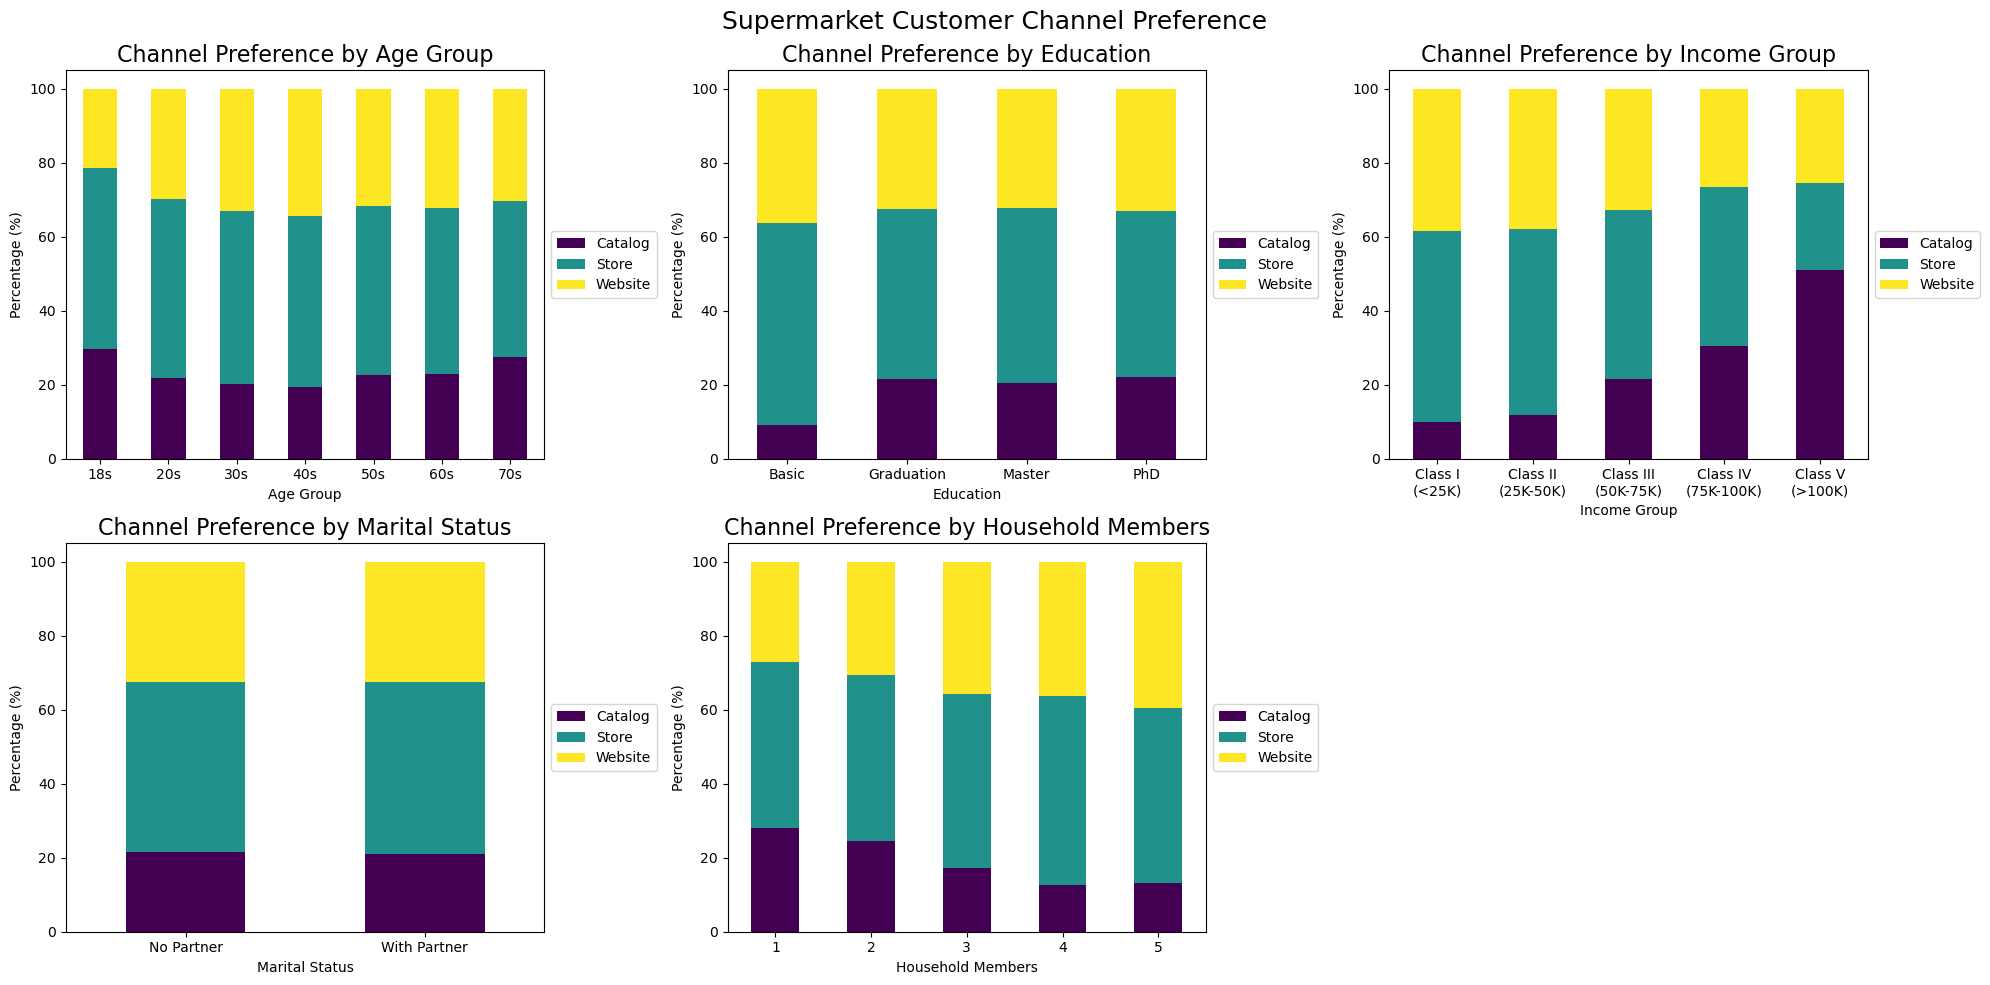

In [121]:
plt.figure(figsize=(20,10))

for kolom in range(len(all_channels.columns)-4):
    ax = plt.subplot(2,3, kolom+1)

    pivot_plot = pd.pivot_table(
    data=all_channels,
    index = all_channels.columns[kolom+2],
    columns= 'Channel',
    values='Total Purchase',
    aggfunc=np.sum,
    margins=True)

    pivot_plot_percent = pivot_percentage(pivot_plot)

    pivot_plot_percent.plot(kind='bar', stacked=True, ax=ax,colormap='viridis')

    plt.title(f"Channel Preference by {all_channels.columns[kolom+2]}",fontsize=16)
    plt.xticks(rotation=0)
    plt.ylabel('Percentage (%)')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Supermarket Customer Channel Preference", fontsize=18)
plt.tight_layout()
;

## ***Channel Preference Summmary***

**Preferensi Channel berdasarkan Umur**

    1) Pada seluruh kategori umur customer, Channel yang cenderung digunakan untuk melakukan transaksi adalah Store.
    2) Kecenderungan transaksi dilakukan melalui Website ada pada customer berumur 40-49 tahun (40s).
    3) Kecenderungan transaksi dilakukan melalui Catalog ada pada customer berumur 18-20 tahun (18s) dan 70-79 tahun (70s)

**Preferensi Channel berdasarkan Latar Belakang Pendidikan**

    1) Pada seluruh kategori latar belakang pendidikan customer, Channel yang cenderung digunakan untuk melakukan transaksi adalah Store.
    2) Semakin tinggi latar belakang pendidikan customer, kecenderungan pembelian melalui Catalog juga semakin tinggi.
    3) Kecenderungan pembelian melalui Website berdasarkan latar belakang pendidikan customer memiliki kecenderungan yang hampir serupa, tetapi paling tinggi pada customer dengan latar belakang pendidikan Basic.
    
**Preferensi Channel berdasarkan Income Group**

    1) Pada seluruh kategori customer berdasarkan rentang gaji, kecuali customer dengan gaji >100K, Channel yang cenderung digunakan untuk melakukan transaksi adalah Store. 
    2) Pada customer dengan gaji >100K (Class V), Channel yang cenderung digunakan untuk melakukan transaksi adalah Catalog.
    3) Semakin besar gaji customer, kecenderungan pemilihan Catalog sebagai Channel transaksi semakin tinggi.
    4) Semakin besar gaji customer, kecenderungan pemilihan Website dan Store sebagai Channel transaksi semakin rendah.
    
**Preferensi Channel berdasarkan Marital Status**

    1) Kecenderungan pemilihan Channel transaksi pada customer With Partner dan No Partner memiliki pola yang sama, yaitu cenderung membeli melalui Store, dan cenderung memilih Website dibandingkan Catalog.
    
**Preferensi Channel berdasarkan Household Members**

    1) Pada seluruh kategori customer berdasarkana jumlah anggota keluarga nya, Channel yang cenderung digunakan untuk melakukan transaksi adalah Store. 
    2) Semakin banyak anggota keluarga nya, kecenderungan pemilihan Catalog sebagai Channel transaksi semakin rendah.
    4) Semakin banyak anggota keluarga nya, kecenderungan pemilihan Website sebagai Channel transaksi semakin rendah.

## ***Website Conversion Rate***

    Conversion Rate merupakan persentase order yang terjadi terhadap total visit pada sebuah website. Pada bagian ini, dilakukan perhitungan Website Conversion Rate customer demografis nya.

### **Data Preparation**

    Pada tahap ini dilakukan perhitungan conversion rate berdasarkan perbandingan antara order dan visit yang terjadi.
    Data yang tercatat dari dataframe sumber hanyalah nilai Visit di bulan terakhir dan total pembelian yang dilakukan customer (tidak dijelaskan pada rentang waktu kapan).
    Maka dari itu, untuk mengetahui banyak nya order per bulan, pada analisa ini diasumsikan bahwa jumlah order per bulan adalah total order customer tersebut dibagi banyaknya bulan hingga periode data ini diambil (berdasarkan perkiraan sebelumnya) 

In [122]:
# membuat dataframe
df_website = df_channel.drop(columns=['NumStorePurchases','NumCatalogPurchases'])

# mencari rentang bulan dari awal penjualan ke data diambil
first_customer_date = df_channel.sort_values(by='First Transaction').head(1)['First Transaction'][df_channel['First Transaction'].idxmin()]
time = (last_updated_date - first_customer_date)// pd.Timedelta(days=30)

# menghitung perkiraan pembelian customer per bulan
df_website['Monthly Purchase'] = ((df_website['NumWebPurchases']/time).round(0)).clip(lower=1).astype(int)

# menghitung conversion rate
df_website['Conversion Rate (%)'] = ((df_website['Monthly Purchase'] / df_website['NumWebVisitsMonth'])*100).round(2)

# simpan dataframe
df_website.to_excel('Supermarket Website Conversion Rate.xlsx',index=False)

# dataframe analisa
df_website.head()

,ID,First Transaction,Age Group,Education,Income Group,Marital Status,Household Members,NumWebPurchases,NumWebVisitsMonth,Monthly Purchase,Conversion Rate (%)
0,5524,2012-09-04,50s,Graduation,Class III\n(50K-75K),No Partner,1,8,7,1,14.29
1,2174,2014-03-08,60s,Graduation,Class II\n(25K-50K),No Partner,3,1,5,1,20.00
2,4141,2013-08-21,40s,Graduation,Class III\n(50K-75K),With Partner,2,8,4,1,25.00
3,6182,2014-02-10,30s,Graduation,Class II\n(25K-50K),With Partner,3,2,6,1,16.67
4,5324,2014-01-19,30s,PhD,Class III\n(50K-75K),With Partner,3,5,5,1,20.00


### **Website Conversion Rate Visualization**

Visualisasi Website Conversion Rate dibuat dengan 2 grafik yang berbeda yaitu barplot dan lineplot. 

Visualisasi Conversion Rate berdasarkan visit dan jumlah order dibuat menggunakan Tableau di link ini:
https://public.tableau.com/shared/2ZBDGDZMN?:display_count=n&:origin=viz_share_link 

Visualisasi trend Conversion Rate tiap categori customer demografis dibuat pada code di bagian ini.

''

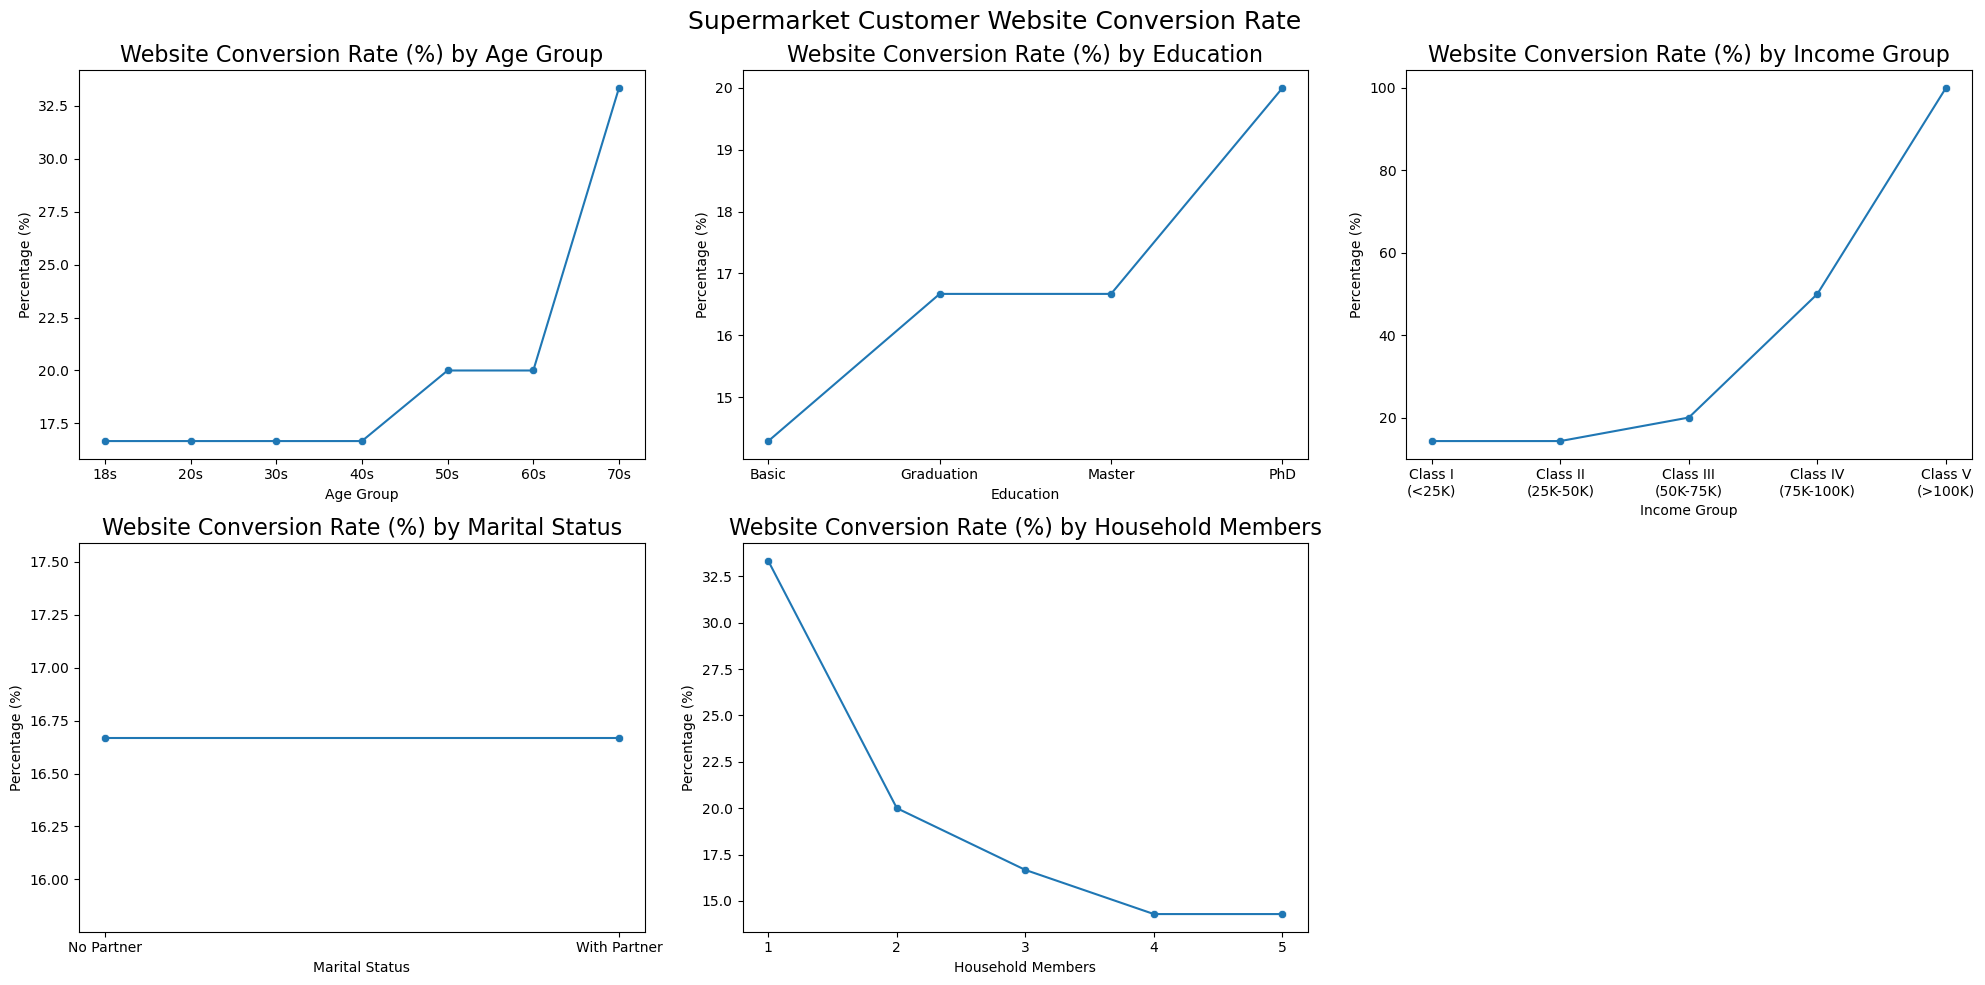

In [123]:
plt.figure(figsize=(20,10))


for kolom in range(len(df_website.columns)-6):
    ax = plt.subplot(2,3, kolom+1)

    df_plot = df_website.groupby(df_website.columns[kolom+2]).median()[['Conversion Rate (%)']]
    df_plot = df_plot.reset_index()

    sns.lineplot(data=df_plot,x=df_plot.columns[0],y='Conversion Rate (%)')
    sns.scatterplot(data=df_plot,x=df_plot.columns[0],y='Conversion Rate (%)')

    plt.title(f"Website Conversion Rate (%) by {df_website.columns[kolom+2]}",fontsize=16)
    plt.xticks(df_plot[df_plot.columns[0]],rotation=0)
    plt.ylabel('Percentage (%)')

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Supermarket Customer Website Conversion Rate", fontsize=18)
plt.tight_layout()
;

### **Website Conversion Rate Summary**

**Berdasarkan Umur**

    1) Customer yang paling sering melakukan visit dan order adalah customer Age Group 40s dan 30s.
    2) Customer dengan Conversion Rate paling tinggi adalah customer Age Group 70s, tetapi jumlah customer yang visit sangat sedikit.
    3) Ada kecenderungan semakin tua umur customer, semakin tinggi Conversion Rate nya.

**Berdasarkan Latar Belakang Pendidikan**

    1) Customer yang paling sering melakukan visit dan order adalah customer dengan latar belakang pendidikan Graduation.
    2) Customer dengan Conversion Rate paling tinggi adalah customer dengan latar belakang pendidikan PhD, tetapi jumlah customer yang visit masih lebih sedikit dibandingkan kategori lainnya selain kategori Basic.
    3) Ada kecenderungan semakin tinggi latar belakang pendidikan customer, semakin tinggi Conversion Rate nya.

**Berdasarkan Income Group**

    1) Customer yang paling sering melakukan visit dan order adalah customer dengan gaji 25K-50K (Class II), meskipun Conversion Rate nya tidak setinggi kelas lainnya.
    2) Customer dengan Conversion Rate paling tinggi adalah customer dengan income diatas 100K, tetapi jumlah customer yang visit masih paling sedikit dibandingkan kategori lainnya.
    3) Ada kecenderungan semakin tinggi besar customer, semakin tinggi Conversion Rate nya.

**Berdasarkan Household Members**

    1) Customer With Partner lebih sering melakukan visit dan order dibandingkan dengan Customer No Partner.
    2) Pada Customer With Partner dan Customer No Partner, visit dan oder paling sering dilakukan oleh customer dengan jumlah anggota keluarga 2 orang.
    3) Conversion Rate Customer With Partner dan Customer No Partner memiliki pola yang cenderung sama
    4) Ada kecenderungan semakin banyak jumlah anggota keluarga, semakin rendah conversion rate nya.


---
# **Promotion Response Analysis**
    Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi dan memahami ketanggapan konsumen atas campaign yang sudah diaktivasi dalam sebuah periode tertentu. Ketanggapan konsumen terhadap campaign dapat kita ketahui berdasarkan berapa banyak customer yang melakukan order ketika suatu campaign/promosi berjalan.

## ***All Time Campaign Performance***

    Pada bagian ini, dilakukan analisa untuk mengidentifikasi berapa banyak customer yang berhasil ter-convert (berhasil melakukan pembelian) pada campaign-campaign yang telah dijalankan. 

### **Data Preparation**

    Pada tahap ini dilakukan pembuatan dataframe baru dengan menggabungkan keterangan apakah seorang customer melakukan pada Campaign yang berjalan di Supermarket. Karena pada source dataframe penjualan tiap campaign terpisah pada kolom masing-masing, maka pada bagian ini kolom-kolom penjualan tiap campaign ditumpuk ke bawah (menjadi baris) agar mempermudah proses analisa dan visualisasi.


In [124]:
# membuat dataframe baru untuk keperluan analisa promosi
df_promotion = df[['ID', 'Year_Birth', 'Age', 'Age Group', 'Education', 'Marital Status',
       'Income Group', 'Household Members', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# dataframe bantuan untuk pemilihan kolom
df_promotion_columns = pd.DataFrame(df_promotion.columns, columns=['Column']).transpose()
df_promotion_columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Column,ID,Year_Birth,Age,Age Group,Education,Marital Status,Income Group,Household Members,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response


In [125]:
def promotion_data_unstacking(df):
    campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']    
    
    campaign_cols = list(range(9,15,1))                               
    
    dfs = {}

    for i, campaign in enumerate(campaigns):
        cols = list(range(9)) + [campaign_cols[i]]

        dfs[campaign] = df.iloc[:, cols].rename(columns={df.columns[campaign_cols[i]]: 'Purchase/Not'})   

        dfs[campaign]['Campaign'] = campaign

    df_campaigns = pd.concat(dfs.values(), axis=0)

    df_campaigns['Purchase/Not'] = np.where(df_campaigns['Purchase/Not']>0,'Yes','No')
                       
    return df_campaigns

promotion_result = promotion_data_unstacking(df_promotion)

promotion_result.head()

,ID,Year_Birth,Age,Age Group,Education,Marital Status,Income Group,Household Members,NumDealsPurchases,Purchase/Not,Campaign
0,5524,1957,57,50s,Graduation,No Partner,Class III\n(50K-75K),1,3,No,Campaign 1
1,2174,1954,60,60s,Graduation,No Partner,Class II\n(25K-50K),3,2,No,Campaign 1
2,4141,1965,49,40s,Graduation,With Partner,Class III\n(50K-75K),2,1,No,Campaign 1
3,6182,1984,30,30s,Graduation,With Partner,Class II\n(25K-50K),3,2,No,Campaign 1
4,5324,1981,33,30s,PhD,With Partner,Class III\n(50K-75K),3,5,No,Campaign 1


### **Campaign Performance Visualization**

    Proses visualisasi digunakan menggunakan bar plot karena lebih mudah untuk diinterpretasi perbandingan jumlah customer yang ter-convert dan tidak ter-convert pada tiap campaign nya.

''

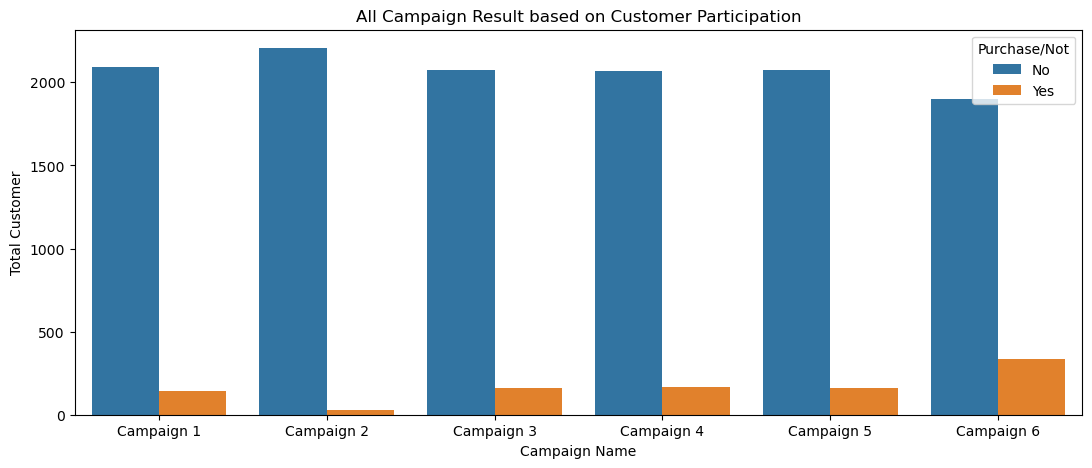

In [126]:
plt.figure(figsize=(13,5))
sns.countplot(data=promotion_result,x='Campaign',hue='Purchase/Not')
plt.ylabel('Total Customer')
plt.xlabel('Campaign Name')
plt.title('All Campaign Result based on Customer Participation')
;

### **Campaign Performance Summary**

    1) Pada Campaign yang telah dijalankan, Campaign yang berhasil menarik paling banyak customer untuk melakukan order adalah Campaign 6.
    2) Campaign yang paling sedikit menarik customer untuk melakukan order adalah Campaign 2.
    3) Meskipun semakin lama semakin banyak juga customer yang melakukan order pada campaign, jumlah customer yang melakukan order di campaign sangat jauh lebih rendah dibandingkan dengan customer yang tidak melakukan order.

## ***Campaign Response Analysis***

    Pada bagian ini, dilakukan cohort analysis berdasarkan pada Campaign berapa customer mulai memberi barang, dan pada campaign mana lagi customer tersebut melakukan pembelian ulang.
    Hasil dari cohort analysis ini dapat digunakan unuk mengidentifikasi seberapa sering customer melakukan re-purchase pada periode campaign tertentu, dimana hal ini juga menunjukkan bagaimana ketanggapan customer terhadap promo dan campaign yang telah dijalankan. 

### **Data Preparation**

    1) Pada bagian ini dilakukan pembuatan pivot cohort yang mengelompokkan customer berdasarkan Campaign ke berapa mereka mulai berpartisipasi (membeli produk saat Campaign berjalan). 
    2) Setelah itu, dilakukan pembuatan pivot baru berdasarkan persentase jumlah customer yang melakukan pembelian lagi (re-purchase) di Campaign berikutnya. Pivot ini lah yang digunakan untuk visualisasi.

In [127]:
# membuat dataframe baru untuk analisis cohort
campaign_cohort = promotion_result[promotion_result['Purchase/Not']=='Yes']
campaign_cohort = campaign_cohort[['ID','Campaign']]

# Cohort Quarter
campaign_cohort['cohort_quarter'] = campaign_cohort.groupby('ID')['Campaign'].transform('min')

# Current Order 
campaign_cohort['current_order_quarter'] = campaign_cohort['Campaign']

# n_Customers 
campaign_cohort = campaign_cohort.groupby(by=['cohort_quarter', 'current_order_quarter'])[['ID']].nunique().reset_index()

campaign_cohort.head()

,cohort_quarter,current_order_quarter,ID
0,Campaign 1,Campaign 1,144
1,Campaign 1,Campaign 2,13
2,Campaign 1,Campaign 3,24
3,Campaign 1,Campaign 4,47
4,Campaign 1,Campaign 5,68


In [128]:
# n_Customres
campaign_cohort = campaign_cohort.rename(columns= {'ID': 'n_customers'})

# Urutan Campaign
campaign_rank = {'Campaign 0' : 0,'Campaign 1': 1, 'Campaign 2': 2, 'Campaign 3': 3, 'Campaign 4': 4, 'Campaign 5': 5, 'Campaign 6' : 6}

# Period Number
campaign_cohort['cohort_quarter_rank'] = campaign_cohort['cohort_quarter'].map(campaign_rank)
campaign_cohort['cohort_current_rank'] = campaign_cohort['current_order_quarter'].map(campaign_rank)
campaign_cohort['period_number'] = campaign_cohort['cohort_current_rank'] - campaign_cohort['cohort_quarter_rank']
campaign_cohort = campaign_cohort.drop(columns=['cohort_quarter_rank','cohort_current_rank'])

campaign_cohort.head()

,cohort_quarter,current_order_quarter,n_customers,period_number
0,Campaign 1,Campaign 1,144,0
1,Campaign 1,Campaign 2,13,1
2,Campaign 1,Campaign 3,24,2
3,Campaign 1,Campaign 4,47,3
4,Campaign 1,Campaign 5,68,4


In [129]:
# melakukan penghitungan jumlah customer berdasarkan waktu pembelian tiap campaign nya 
pivot_campaign_cohort = campaign_cohort.pivot_table(
    index= 'cohort_quarter',
    columns= 'period_number',
    values='n_customers'
)

# persentase jumlah customer pada tiap campaign nya
pivot_campaign_cohort_percent = (pivot_campaign_cohort.div(pivot_campaign_cohort[0], axis=0) * 100).round(2)
user_count = pivot_campaign_cohort[0].to_frame()
pivot_campaign_cohort_percent.insert(0, 'Total_Customer', user_count)

# pivot untuk digunakan pada analisa cohort
pivot_campaign_cohort_percent

period_number,Total_Customer,0,1,2,3,4,5
cohort_quarter,,,,,,,
Campaign 1,144.0,100.0,9.03,16.67,32.64,47.22,54.86
Campaign 2,17.0,100.0,23.53,70.59,35.29,47.06,NaN
Campaign 3,135.0,100.0,NaN,4.44,42.22,NaN,NaN
Campaign 4,108.0,100.0,22.22,21.30,NaN,NaN,NaN
Campaign 5,58.0,100.0,36.21,NaN,NaN,NaN,NaN
Campaign 6,146.0,100.0,NaN,NaN,NaN,NaN,NaN


### **Campaign Response Rate Visualization**
    Proses visualisasi dilakukan menggunakan heat map untuk mempermudah interpretasi persentase re-purchase customer pada tiap Campaign Cohort nya.

''

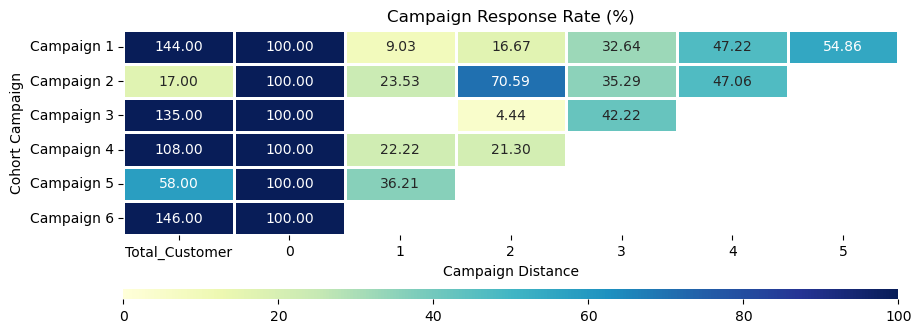

In [130]:
grid_kw = {
    'height_ratios': (20, 1),       
    'hspace': 0.5                   
}


fig, (ax_top, ax_bottom) = plt.subplots(nrows= 2, ncols= 1, figsize= (10, 3.5), gridspec_kw= grid_kw)

sns.heatmap(
    data= pivot_campaign_cohort_percent,
    ax= ax_top,                                 
    cbar_ax= ax_bottom,                         
    cbar_kws= {'orientation': 'horizontal'},    
    annot= True,                                
    fmt= '.2f',                                 
    cmap= 'YlGnBu',                             
    linewidths= 2,
    vmin= 0,
    vmax= 100
)
ax_top.set_xlabel('Campaign Distance')
ax_top.set_ylabel('Cohort Campaign')
ax_top.set_title('Campaign Response Rate (%)')
;

### **Campaign Response Summary**

    1) Untuk customer yang melakukan pembelian pertama di Campaign 1, Campaign 2, dan Campaign3, terjadi peningkatan jumlah order dari Campaign 5 ke Campaign 6.
    2) Untuk customer yang melakukan pembelian pertama di Campaign 4, terjadi penurunan jumlah order pada campaign - campaign berikutnya.
    3) Pada Campaign ke 4, tidak ada customer yang melakukan pembelian pertama di Campaign 3 yang melakukan order.
    4) Pada Campaign ke 4, terjadi peningkatan jumlah customer yang melakukan pembelian secara signifikan oleh customer yang melakukan pembelian pertama di Campaign ke 2.
    5) Untuk customer yang melakukan pembelian pertama di Campaign 1, selalu terjadi peningkatan jumlah customer yang berpartisipasi dari Campaign satu ke Campaign berikutnya.
    6) Customer yang melakukan transaksi di Campaign 1 merupakan customer dengan Age Group 40s, Education PhD, Income Group Class II (25K-50K), Household Members 3.

## ***Discount Utilization Rate***

    Pada bagian ini, dilakukan analisa perilaku tiap customer segment dalam penggunaan diskon. Hal ini dilakukan dengan mencari proporsi jumlah order yang menggunakan diskon dibandingkan dengan total order customer tersebut.

### **Data Preparation**

    Pada bagian ini, dilakukan perhitungan seluruh jumlah order tiap customer yang kemudian dibagi dengan dengan jumlah order yang dibuat menggunakan diskon.

In [131]:
df_deals = df[['ID','Age Group', 'Income Group', 'Household Members', 'Marital Status', 'NumDealsPurchases']].rename(columns={'NumDealsPurchases':'Order with Discount'})

pivot_order = pd.pivot_table(
    data=df_sales,
    index='ID',
    columns='Category',
    values='Total Order',
    aggfunc='min'
).reset_index()

# menghitung total order yang telah dilakukan customer selama dia menjadi customer supermarket  
pivot_order['Total Order'] = (pivot_order.iloc[:, 1:].sum(axis=1)).astype(int)

pivot_order = pivot_order[['ID','Total Order']]

df_order = pd.merge(left=df_deals,right=pivot_order,on='ID',how='left')

# mencari proporsi banyaknya order yang dibuat oleh customer dengan menggunakan diskon
df_order['% Discounted Order'] = (df_order['Order with Discount'] / df_order['Total Order'] * 100).round(2)

# dataframe yang akan digunakan untuk visualisasi
df_order.head()

,ID,Age Group,Income Group,Household Members,Marital Status,Order with Discount,Total Order,% Discounted Order
0,5524,50s,Class III\n(50K-75K),1,No Partner,3,52,5.77
1,2174,60s,Class II\n(25K-50K),3,No Partner,2,6,33.33
2,4141,40s,Class III\n(50K-75K),2,With Partner,1,24,4.17
3,6182,30s,Class II\n(25K-50K),3,With Partner,2,6,33.33
4,5324,30s,Class III\n(50K-75K),3,With Partner,5,16,31.25


### **Discount Utilization Rate Visualization**
    Proses visualisasi dilakukan menggunakan lineplot untuk mempermudah interpretasi trend dari perilaku konsumen terhadap penggunaan diskon.

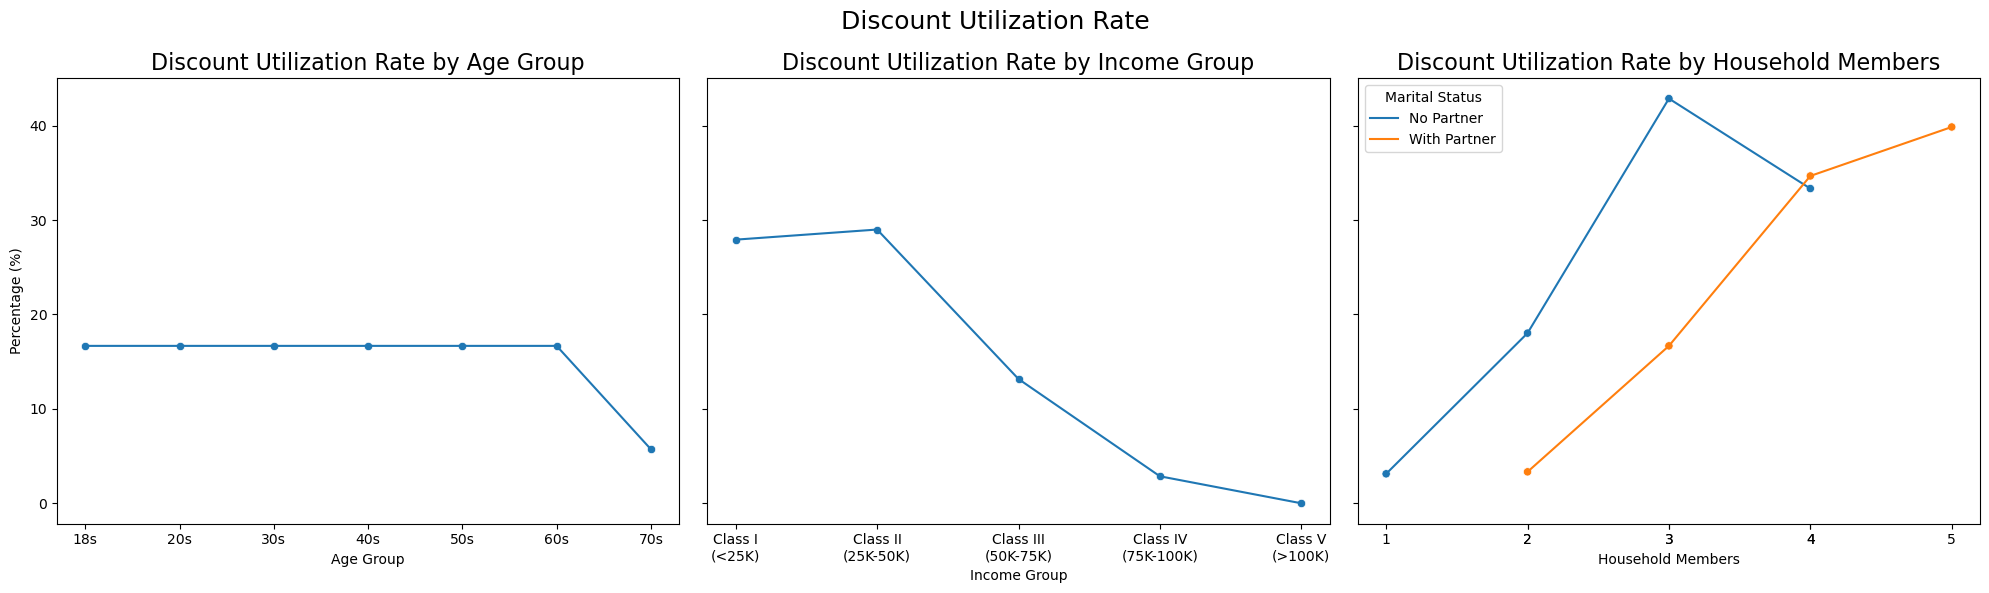

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)


for kolom in range(len(df_order.columns)-5):
    ax = plt.subplot(1,3, kolom+1)

    df_plot = df_order.groupby(df_order.columns[kolom+1]).median()[['% Discounted Order']].reset_index()

    if df_plot.columns[0] == 'Household Members': 
        df_plot = df_order.groupby([df_order.columns[kolom+1],'Marital Status']).median()[['% Discounted Order']].reset_index()
        sns.lineplot(data=df_plot,x=df_plot[df_plot.columns[0]],y='% Discounted Order', hue='Marital Status')
        sns.scatterplot(data=df_plot,x=df_plot[df_plot.columns[0]],y='% Discounted Order',hue='Marital Status',legend=None)
    else:
        sns.lineplot(data=df_plot,x=df_plot[df_plot.columns[0]],y='% Discounted Order')
        sns.scatterplot(data=df_plot,x=df_plot[df_plot.columns[0]],y='% Discounted Order')

    plt.title(f"Discount Utilization Rate by {df_order.columns[kolom+1]}",fontsize=16)
    plt.xticks(df_plot[df_plot.columns[0]],rotation=0)
    plt.ylabel('Percentage (%)')

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Discount Utilization Rate", fontsize=18)
plt.tight_layout();

### **Discount Utilization Rate Summary**

    1) Pola penggunaan diskon berdasarkan umur pada setiap kategori umur customer cenderung sama, kecuali pada customer dengan umur 70-79 tahun (lebih sedikit menggunakan diskon).
    2) Berdasarkan gaji customer, penggunaan diskon paling banyak dilakukan oleh customer dengan Income Group Class II (25K-50K).
    3) Meskipun penggunaan diskon oleh customer Class II tinggi, ada kecenderungan semakin besar gaji customer, semakin sedikit persentase penggunaan diskon ketika order.
    4) Pada customer With Partner, semakin banyak jumlah anggota keluarga, semakin tinggi persentase penggunaan diskon ketika order.
    5) Pada customer No Partner dengan jumlah anggota keluarga 1 sampai 3, semakin tinggi persentase penggunaan diskon ketika order.
    6) Penggunaan diskon pada customer No Partner dengan jumlah anggota keluarga 4 orang lebih kecil dibandingkan anggota keluarga 3 orang.

---
# **Customer Retention Analysis**
    Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi dan memahami tingkat keberhasilan bisnis dalam menjaga retensi pelanggan. Hal ini dapat dilihat dari beberapa faktor yaitu Churn Rate, Tenure, dan Customer Lifetime Value.

## ***Tenure***
    Tenure merupakan lamanya waktu seorang pelanggan tetap berlangganan atau membeli produk dari sebuah perusahaan. Pada bagian ini, dilakukan analisa tenure yang bertujuan untuk memahami perilaku customer berdasarkan demografis dan lamanya mereka tetap aktif melakukan pembelian di Supermarket. 



### **Data Preparation**

    Pada tahap ini dilakukan perhitungan Tenure dengan mencari tanggal pembelian terakhir tiap customer berdasarkan selisih dari tanggal data diambil dan 'recency' nya.

In [133]:
# membuat dataframe baru untuk analisa tenure
df_recency = df[['ID', 'Age Group', 'Education', 'Income Group', 'Household Members', 'Marital Status', 'First Transaction', 'Recency']].copy()

# menambahkan kolom tanggal data diambil (sesuai perhitungan awal)
df_recency['Last Updated Data'] = last_updated_date

# menambahkan kolom tanggal transaksi terakhir customer dengan menghitung selisih dari data diambil dengan recency tiap customer
df_recency['Last Transaction'] = df_recency['Last Updated Data'] - pd.to_timedelta(df_recency['Recency'], unit='D')

# menambahkan kolom 'Tenure' berisikan berapa lama seorang customer sudah menjadi member aktif di supermarket 
df_recency['Tenure'] = (df_recency['Last Transaction'] - df_recency['First Transaction']).dt.days.astype(int)

# summary statistik data 'Tenure'
df_recency['Tenure'].describe()

count    2236.000000
mean      354.656977
std       203.548768
min       -47.000000
25%       179.000000
50%       355.000000
75%       529.000000
max       744.000000
Name: Tenure, dtype: float64

    Setelah dilakukan perhitungan tenure menggunakan dataframe source, terdapat beberapa data yang nilainya negatif. Hal ini disebabkan karena ada kemungkinan salah perkiraan Last Updated Date (pada sumber data tidak ada info kapan tanggal data diambil, hanya bisa diperkirakan di tahap awal sebelumnya). 

    1) Untuk memperbaiki data Tenure, maka tanggal 'Last Transaction' pada data dengan 'Tenure' negatif perlu di update
    2) Pembaharuan tanggal dilakukan dengan menambahkan tanggal transaksi pertama dengan recency 
    3) Tanggal tersebut kemudian digunakan untuk memperbaharui value 'Tenure' yang negatif.


In [134]:

df_recency.loc[df_recency['Tenure'] < 0, 'Last Transaction'] = df_recency['First Transaction'] + pd.to_timedelta(df_recency['Recency'], unit='D')

df_recency['Tenure'] = (df_recency['Last Transaction'] - df_recency['First Transaction']).dt.days.astype(int)

# summary statistik data 'Tenure' yang sudah diperbaharui nilai 'Tenure' nya
df_recency['Tenure'].describe()

count    2236.000000
mean      356.008945
std       201.395591
min         0.000000
25%       179.000000
50%       355.000000
75%       529.000000
max       744.000000
Name: Tenure, dtype: float64

### **Customer Tenure Visualization**
    Proses visualisasi dilakukan dengan menggunakan lineplot untuk mempermudah interpretasi trend dari perilaku konsumen terhadap penggunaan diskon. Data Tenure yang ditampilkan merupakan median dari Tenure tiap Customer Segment.

''

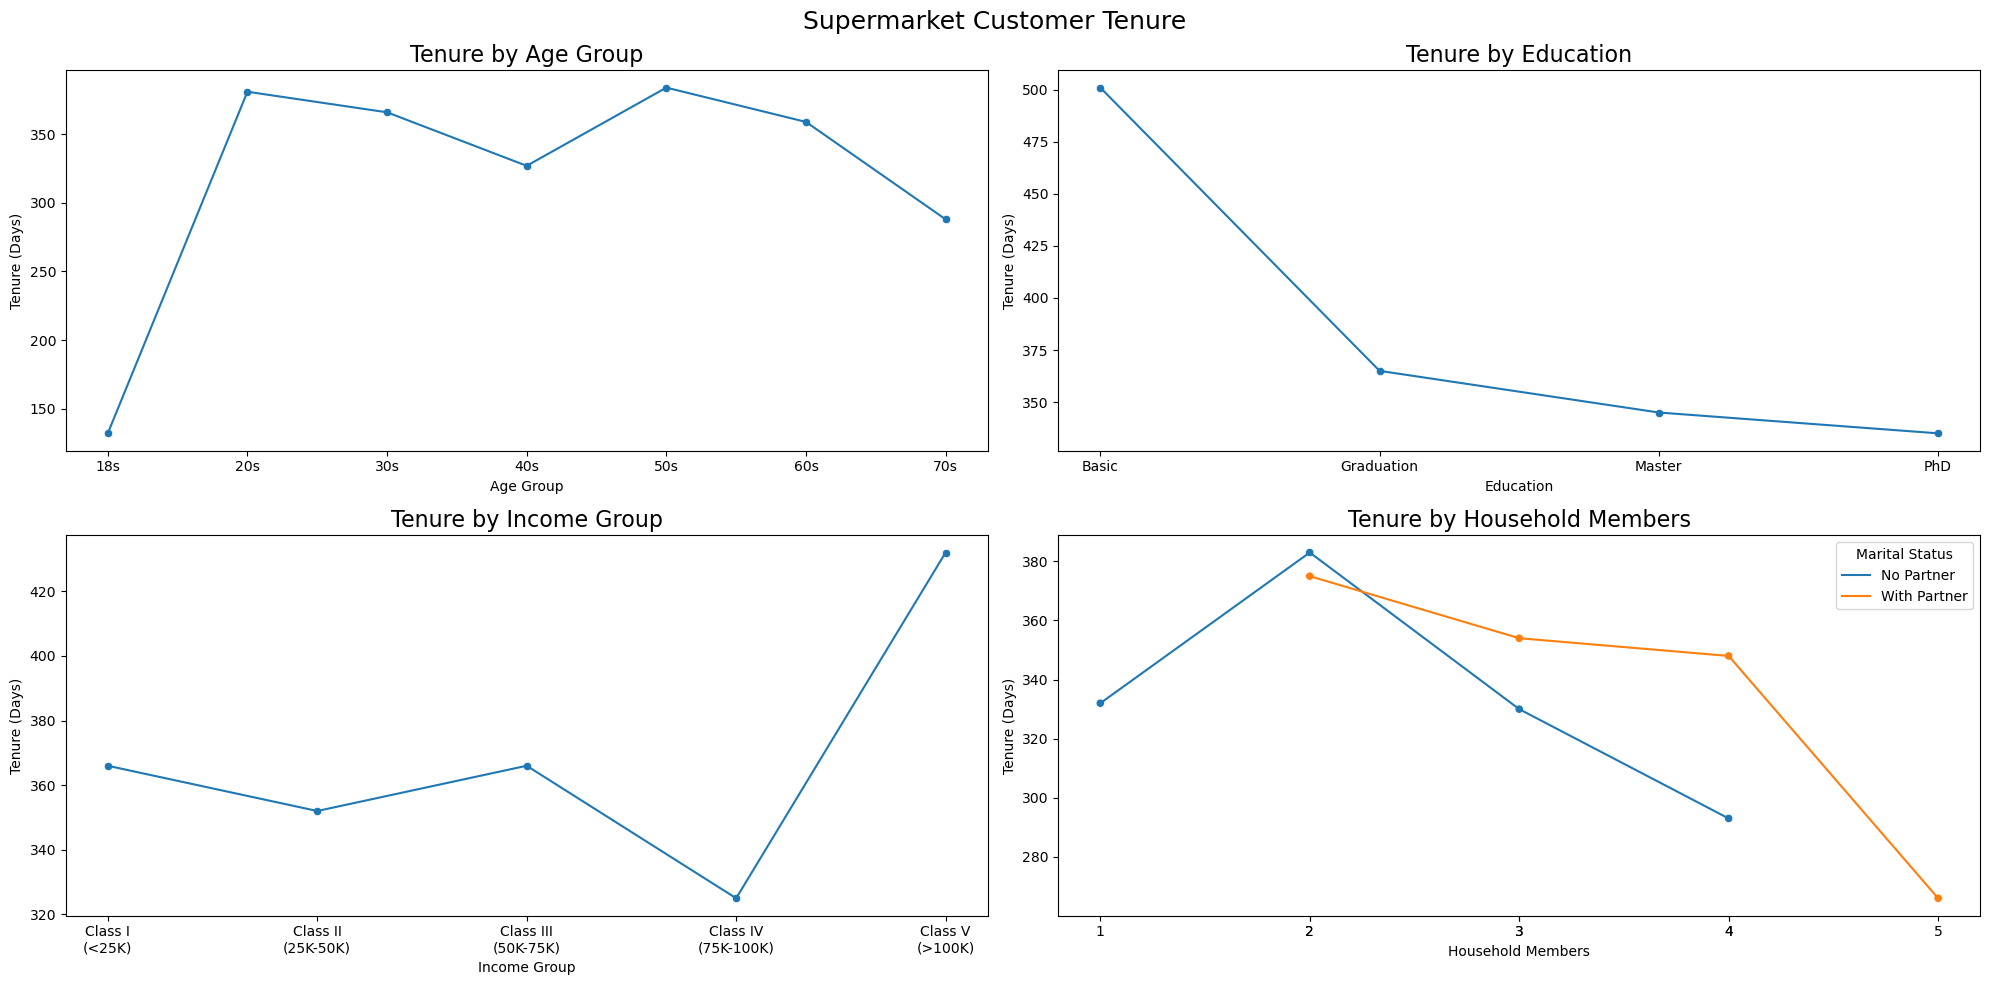

In [135]:
plt.figure(figsize=(20,10))

for kolom in range(len(df_recency.columns)-7):
    ax = plt.subplot(2,2, kolom+1)

    df_plot = (df_recency.groupby(df_recency.columns[kolom+1]).median()[['Tenure']]).astype(int).reset_index()

    if df_plot.columns[0] == 'Household Members': 
        df_plot = df_recency.groupby(['Household Members','Marital Status']).median()[['Tenure']].astype(int).reset_index()
        sns.lineplot(data=df_plot,x='Household Members',y='Tenure',hue='Marital Status')
        sns.scatterplot(data=df_plot,x='Household Members',y='Tenure',hue='Marital Status',legend=None)
    else:
        sns.lineplot(data=df_plot,x=df_plot.columns[0],y='Tenure')
        sns.scatterplot(data=df_plot,x=df_plot.columns[0],y='Tenure')

    plt.title(f"Tenure by {df_recency.columns[kolom+1]}",fontsize=16)
    plt.xticks(df_plot[df_plot.columns[0]],rotation=0)
    plt.ylabel('Tenure (Days)')

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Supermarket Customer Tenure", fontsize=18)
plt.tight_layout()

;

### **Customer Tenure Summary**

**Tenure berdasarkan Umur** 

    1) Customer yang paling lama menjadi pelanggan di Supermarket adalah customer ber-umur 20-29 tahun dan 50-59 tahun.
    2) Customer yang paling cepat berhenti menjadi pelanggan di Supermarket adalah customer ber-umur 18-20 tahun.

**Tenure berdasarkan Latar Belakang Pendidikan**

    1) Customer yang paling lama menjadi pelanggan di Supermarket adalah customer dengan latar belakang pendidikan Basic
    2) Customer yang paling cepat berhenti menjadi pelanggan di Supermarket adalah customer dengan latar belakang pendidikan PhD
    3) Semakin tinggi latar belakang pendidikan customer, semakin sebentar tenure customer tersebut

**Tenure berdasarkan Income Group**

    1) Customer yang paling lama menjadi pelanggan di Supermarket adalah customer dengan rentang gaji di atas 100K (Class V)
    2) Customer yang paling cepat berhenti menjadi pelanggan di Supermarket adalah customer dengan rentang gaji 50K-75K (Class IV)
    3) Semakin tinggi gaji customer, ada kecenderungan semakin lama tenure customer tersebut

**Tenure berdasarkan Anggota Keluarga**

    1) Pada customer With Partner, customer yang paling lama menjadi pelanggan di Supermarket adalah customer dengan anggota keluarga 2, yang paling cepat berhenti menjadi pelanggan adalah customer dengan anggota keluarga 4
    2) Pada customer No Partner, customer yang paling lama menjadi pelanggan di Supermarket adalah customer dengan anggota keluarga 2, yang paling cepat berhenti menjadi pelanggan adalah customer dengan anggota keluarga 5
    3) Semakin banyak jumlah anggota keluarga, ada kecenderungan semakin sebentar tenure customer tersebut
        

## ***Customer Lifetime Value***

    Customer Lifetime Value atau disingkat CLV adalah ukuran yang digunakan untuk memvaluasi nilai monetaris yang dihasilkan oleh pelanggan selama mereka menjadi customer. Tujuan dilakukan nya analisa ini adalah untuk mengidentifikasi dan memahami customer dengan karakteristik apa yang bernilai tinggi dalam jangka panjang.

### **Data Preparation**
    Pada tahap ini dilakukan pembuatan dataframe yang digunakan untuk menghitung dan visualisasi Customer Lifetime Value.

In [136]:
# membuat dataframe baru untuk analisa customer lifetime value
df_clv = df_sales[['ID', 'Age Group', 'Education',
       'Income Group', 'Household Members', 'Marital Status', 
       'Qty Sold', 'Total Order', 'Category']].copy()

# dataframe untuk analisa
df_clv.head()

,ID,Age Group,Education,Income Group,Household Members,Marital Status,Qty Sold,Total Order,Category
0,5524,50s,Graduation,Class III\n(50K-75K),1,No Partner,635,4,Wines
1,2174,60s,Graduation,Class II\n(25K-50K),3,No Partner,11,1,Wines
2,4141,40s,Graduation,Class III\n(50K-75K),2,With Partner,426,2,Wines
3,6182,30s,Graduation,Class II\n(25K-50K),3,With Partner,11,1,Wines
4,5324,30s,PhD,Class III\n(50K-75K),3,With Partner,173,1,Wines


### **Customer Lifetime Value Visualization**

    1) Proses visualisasi dilakukan dengan menggunakan barplot untuk mempermudah interpretasi nilai CLV tiap segment. 
    2) Customer Lifetime Vale dihitung berdasarkan perkalian antara rata-rata produk terjual dengan rata-rata tenure
    3) Karena data cenderung terdistribusi tidak normal, maka untuk perhitungan CLV pada analisa ini menggunakan median dari produk terjual berdasarkan kategori Customer Segment nya

''

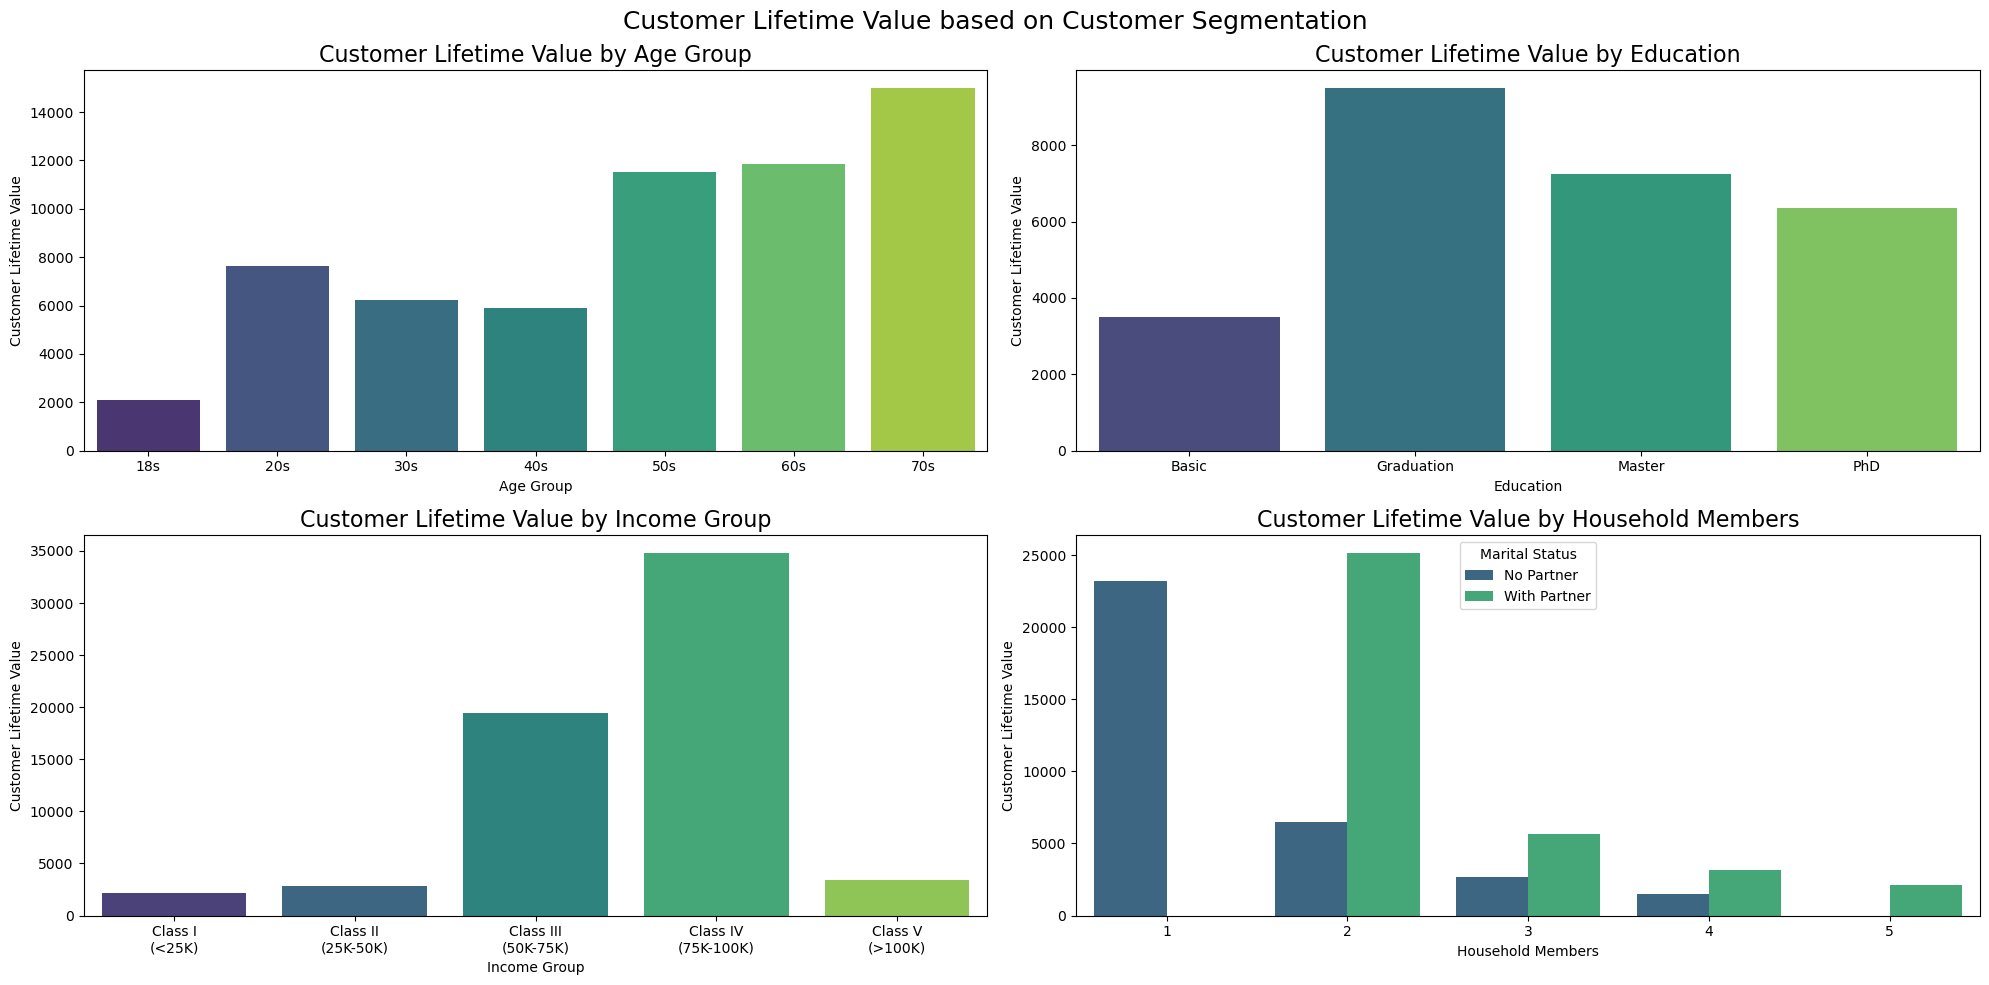

In [137]:
plt.figure(figsize=(20,10))

for kolom in range(len(df_clv.columns)-5):
    ax = plt.subplot(2,2, kolom+1)

    parameter = (df_clv.groupby([df_clv.columns[kolom+1]]).median()[['Qty Sold']]).astype(int)
    tenure = (df_recency.groupby(df_clv.columns[kolom+1]).median()[['Tenure']]).astype(int)

    df_plot = parameter.join(tenure).reset_index()
    df_plot['CLV'] = (df_plot['Qty Sold'] * df_plot['Tenure'])

    if df_plot.columns[0] == 'Household Members': 
        parameter = (df_clv.groupby(['Household Members','Marital Status']).median()[['Qty Sold']]).astype(int)
        tenure = (df_recency.groupby(['Household Members','Marital Status']).median()[['Tenure']]).astype(int)

        df_plot = parameter.join(tenure).reset_index()
        df_plot['CLV'] = (df_plot['Qty Sold'] * df_plot['Tenure'])

        sns.barplot(data=df_plot,x='Household Members',y='CLV',hue='Marital Status',palette='viridis')
    else:
        sns.barplot(data=df_plot,x=df_plot.columns[0],y='CLV',palette='viridis')

    plt.title(f"Customer Lifetime Value by {df_clv.columns[kolom+1]}",fontsize=16)
    plt.xticks(rotation=0)
    plt.ylabel('Customer Lifetime Value')

plt.subplots_adjust(top=0.9, hspace=0.5)
plt.suptitle("Customer Lifetime Value based on Customer Segmentation", fontsize=18)
plt.tight_layout()
;

### **Customer Lifetime Value Summary**

**CLV Berdasarkan Umur**

    1) CLV tertinggi ada pada customer dengan umur 70-79 tahun, sedangkan terrendah pada customer dengan umur 18-20 tahun.
    2) Pada rentang umur customer 50 hingga 79 tahun (kategori 50s, 60s, 70s), semakin tua customer, semakin tinggi juga CLV nya.
    3) Pada rentang umur customer 20 hingga 40 tahun (kategori 20s, 30s, 40s), semakin tua customer, semakin rendah CLV nya.

**CLV Berdasarkan Latar Belakang Pendidikan**
    
    1) CLV tertinggi ada pada customer dengan latar belakang pendidikan Graduation, sedangkan terrendah pada pendidikan Basic.
    2) Dari pendidikan Graduation hingga PhD, semakin tinggi level pendidikan customer, semakin rendah CLV nya.

**CLV Berdasarkan Income Group**
    
    1) CLV tertinggi ada pada customer dengan rentang gaji 75K-100K (Class IV), sedangkan terrendah pada rentang gaji dibawah 25K (Class I)
    2) Pada rentang gaji 0K - 100K, semakin tinggi gaji customer, semakin tinggi juga CLV nya.
    3) CLV customer dengan gaji diatas 100K (Class V) lebih rendah dibandingkan CLV customer Class IV.

**CLV Berdasarkan Anggota Keluarga**
    1) CLV pada customer With Partner dan No Partner memiliki pola yang sama yaitu semakin banyak jumlah anggota keluarga nya, semakin rendah CLV nya.





## ***Churn Rate***

    1) Churn rate adalah tingkat pergantian pelanggan yang mengacu pada persentase banyaknya pelanggan berhenti berbelanja dalam periode waktu tertentu. 
    2) Pada analisa kali ini, customer terhitung sudah churn apabila sudah tidak lagi membeli produk di Supermarket selama satu bulan atau lebih. 
    3) Sebagai contoh, apabila customer terakhir belanja pada bulan May, maka customer tersebut churn di bulan Juni.

### **Data Preparation**
    1) Pada tahap ini dilakukan perhitungan churn rate dengan membuat sebuah fungsi yang dapat digunakan untuk menghitung churn rate tiap  customer segment.
    2) Churn rate dihitung dengan membagi jumlah pelanggan yang hilang (terhitung churn) dengan total jumlah pelanggan pada awal periode tersebut. Untuk analisa kali ini, churn rate dihitung secara bulanan di tahun 2014

In [138]:
df_churn = df_recency[['ID', 'Age Group', 'Education', 'Marital Status', 'Income Group',
       'Household Members', 'First Transaction', 'Last Transaction', 'Tenure']].copy()

df_churn['Last Transaction Month'] = df_churn['Last Transaction'].dt.month

def calc_churn_rate(df,customer_segment):
    churn_group = df.groupby(customer_segment).nunique()[['ID']]
    
    monthly_last_purchase = pd.pivot_table(
        data=df_churn,
        index=customer_segment,
        columns='Last Transaction Month',
        values='ID',
        aggfunc='count',
    )
    
    monthly_churned = monthly_last_purchase.cumsum(axis=1)
    monthly_churned_total = churn_group.join(monthly_churned)

    initial_value = []
    list_month = []
    kolom_monthly_churned = monthly_churned_total.columns

    for i in kolom_monthly_churned:
        if i == 'ID':
            pass
        elif i == 5:
            initial_customer = monthly_churned_total['ID']
            initial_value.append(initial_customer)
            list_month.append(i)
        else:
            initial_customer = monthly_churned_total['ID'] - monthly_churned_total[i-1]
            initial_value.append(initial_customer)
            list_month.append(i)

    initial_customer = pd.DataFrame(initial_value,index=list_month).transpose().iloc[:, :-1]


    kolom_initial_customer = initial_customer.columns
    list_monthly_rate = []
    customer_churn_month = []

    for j in kolom_initial_customer:
        monthly_rate = (monthly_last_purchase[j]/initial_customer[j]*100).round(2)
        list_monthly_rate.append(monthly_rate)
        customer_churn_month.append(j+1)

    monthly_churn_rate = pd.DataFrame(list_monthly_rate,index=customer_churn_month).reset_index().rename(columns={'index':'Month'})


    return monthly_churn_rate

### **Churn Rate by Age Group Visualization**
    Proses visualisasi dilakukan dengan menggunakan lineplot untuk mempermudah interpretasi trend churn rate tiap bulan nya.

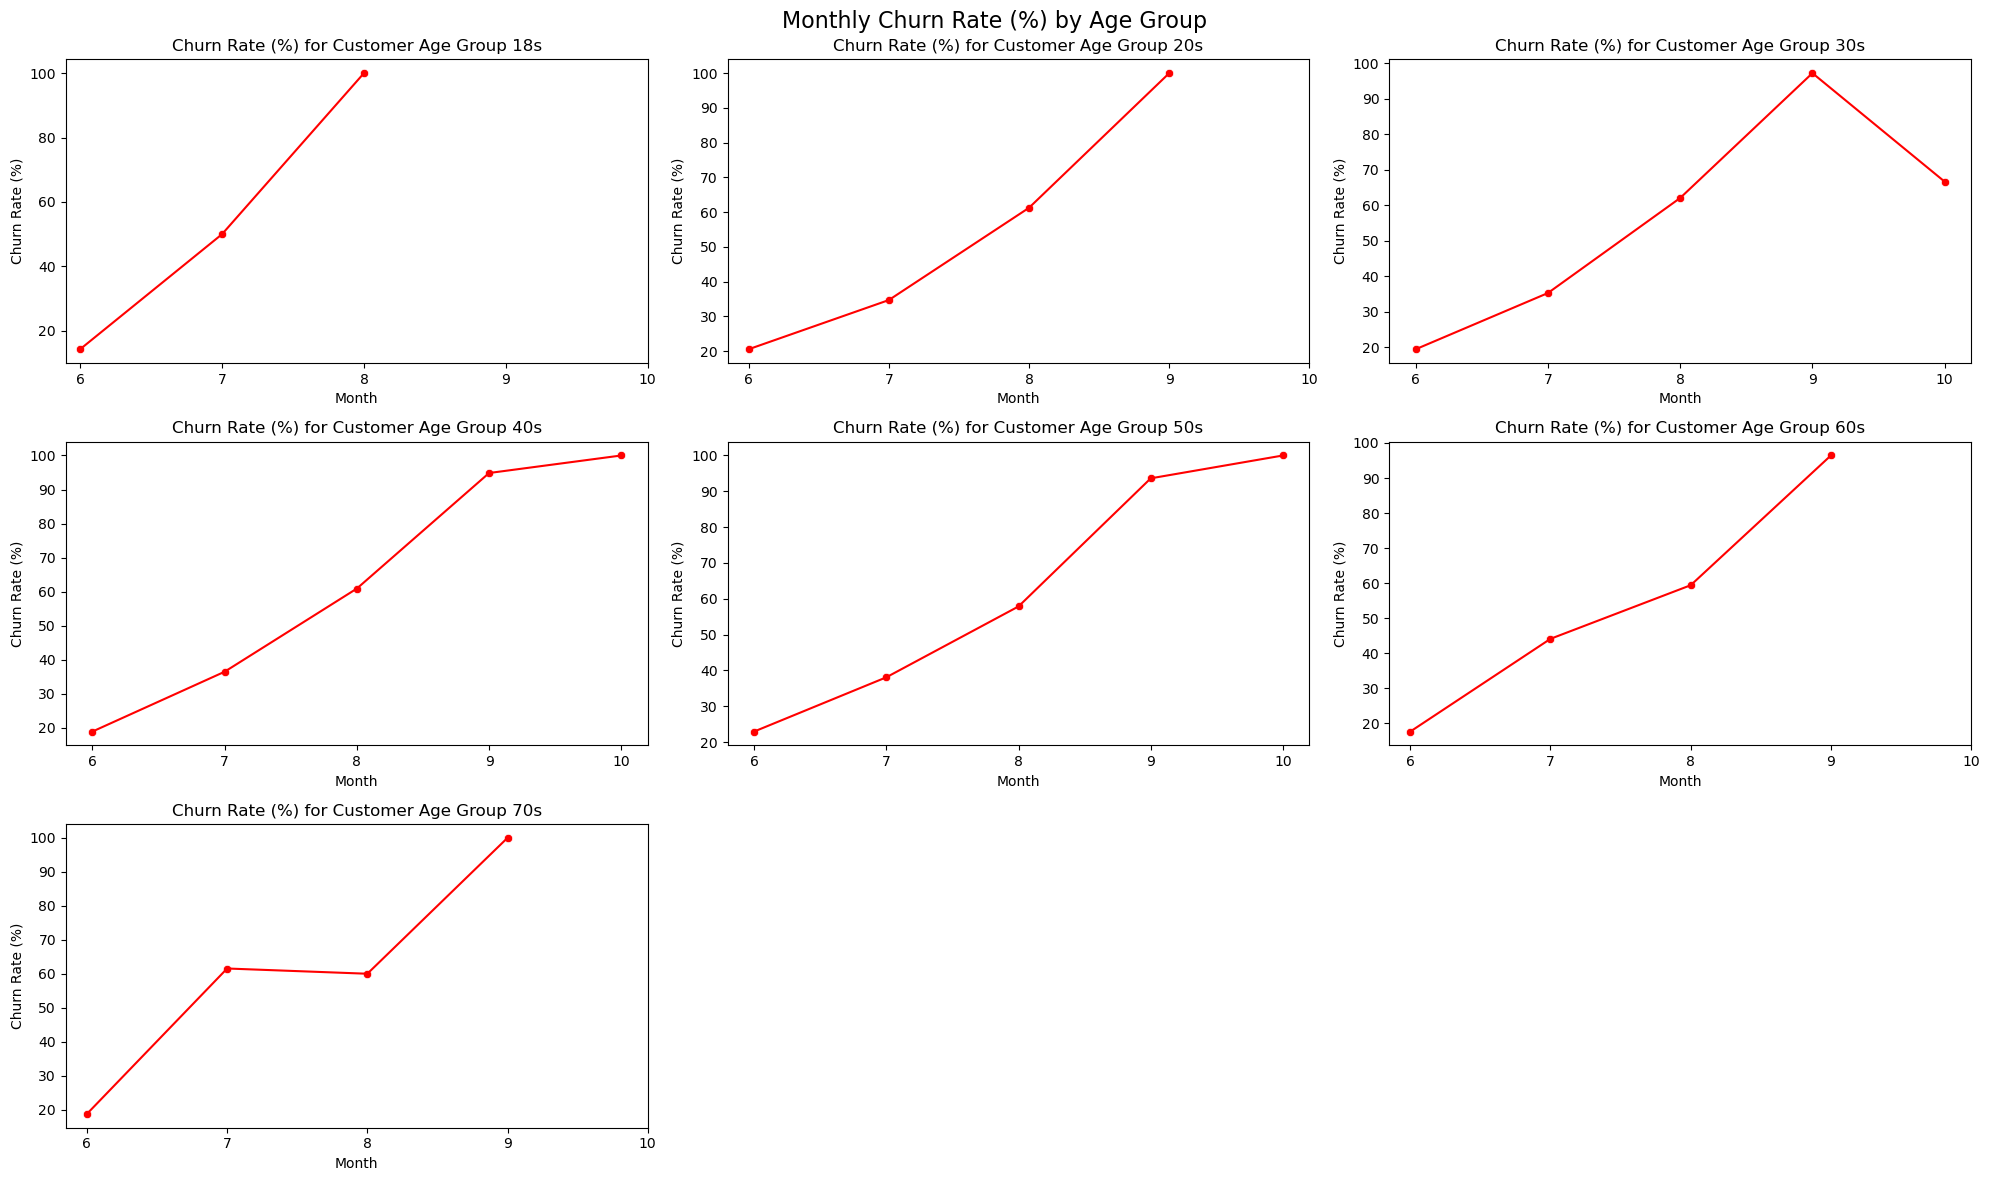

In [139]:
churn_rate_age = calc_churn_rate(df_sales, 'Age Group')

plt.figure(figsize=(20,12))

for kolom in range(len(churn_rate_age.columns)-1):

    plt.subplot(3,3, kolom+1)
    sns.lineplot(data=churn_rate_age,x='Month',y=churn_rate_age.columns[kolom+1],color='red')
    sns.scatterplot(data=churn_rate_age,x='Month',y=churn_rate_age.columns[kolom+1],color='red')
    plt.title(f"Churn Rate (%) for Customer Age Group {churn_rate_age.columns[kolom+1]}")
    plt.xticks(churn_rate_age['Month'])
    plt.ylabel('Churn Rate (%)')

plt.suptitle("Monthly Churn Rate (%) by Age Group", fontsize=16)
plt.tight_layout()

### **Churn Rate by Education Visualization**
    Proses visualisasi dilakukan dengan menggunakan lineplot untuk mempermudah interpretasi trend churn rate tiap bulan nya.

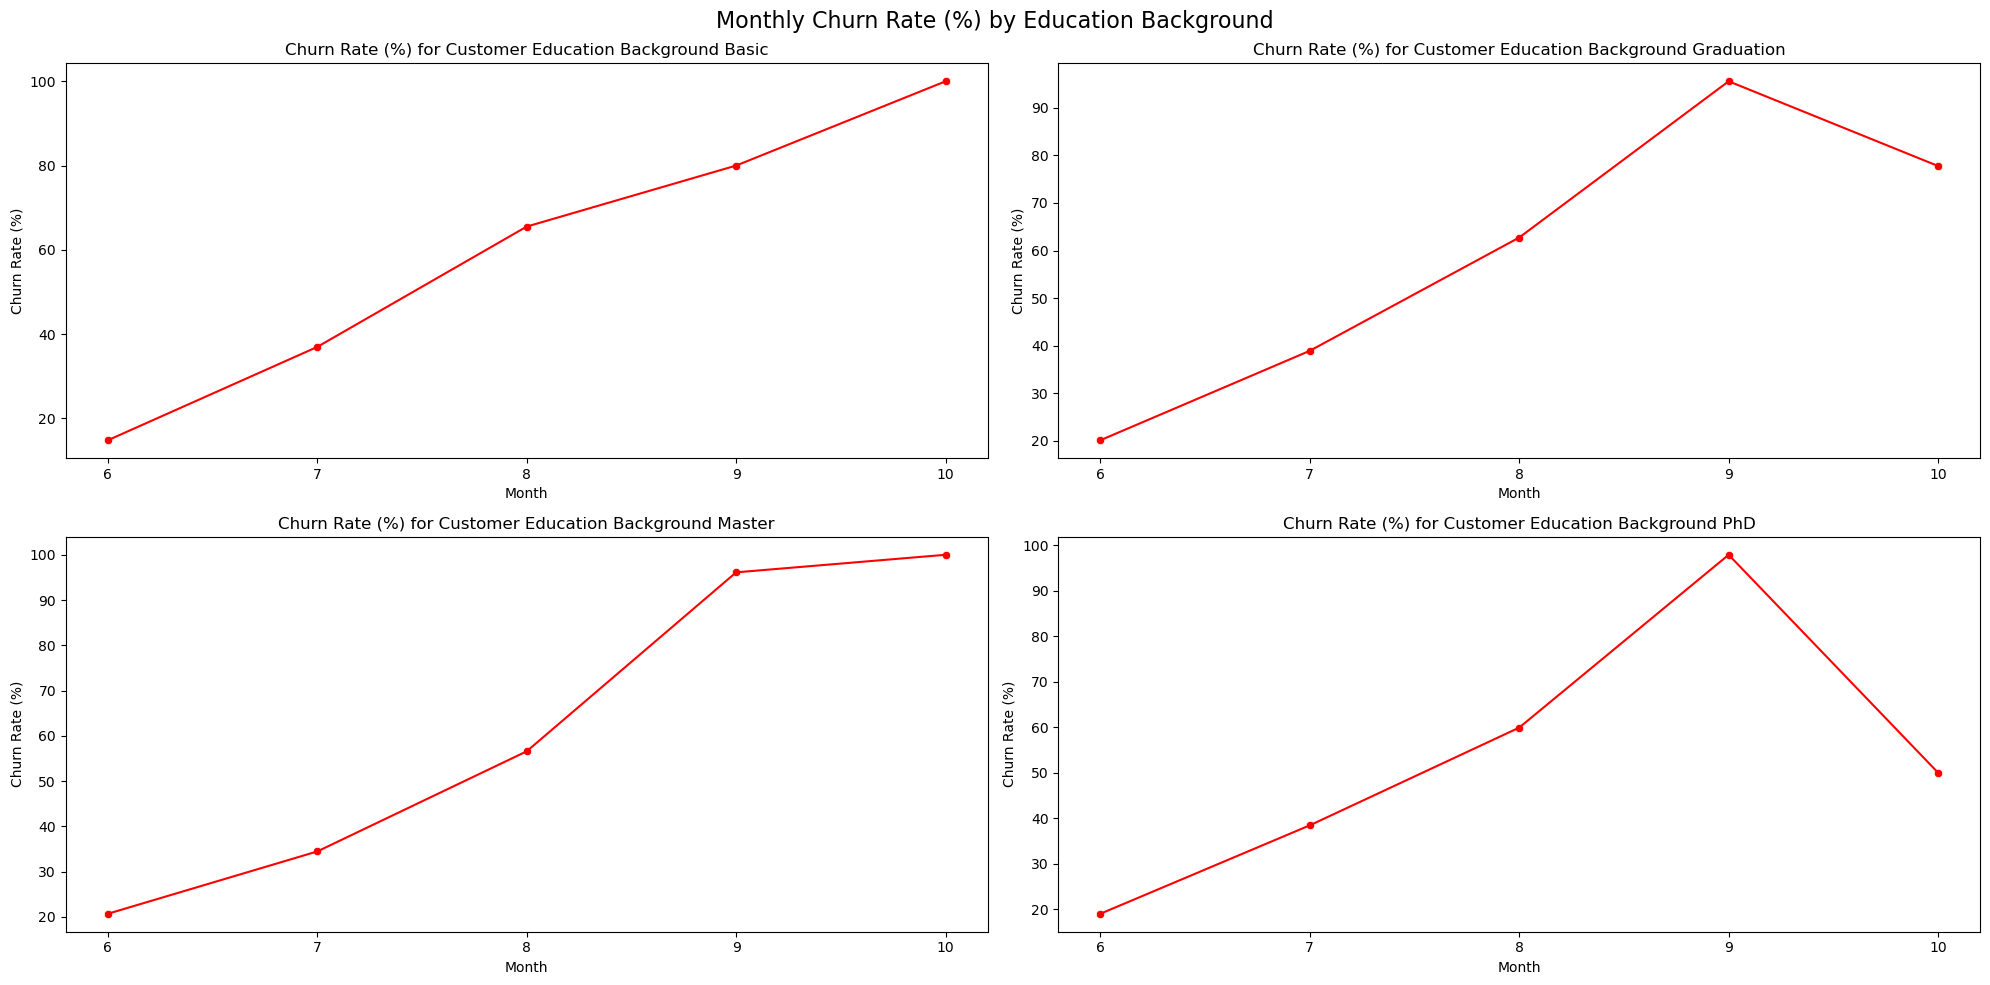

In [140]:
churn_rate_edu = calc_churn_rate(df_sales, 'Education')

plt.figure(figsize=(20,10))

for kolom in range(len(churn_rate_edu.columns)-1):

    plt.subplot(2,2, kolom+1)
    sns.lineplot(data=churn_rate_edu,x='Month',y=churn_rate_edu.columns[kolom+1],color='red')
    sns.scatterplot(data=churn_rate_edu,x='Month',y=churn_rate_edu.columns[kolom+1],color='red')
    plt.title(f"Churn Rate (%) for Customer Education Background {churn_rate_edu.columns[kolom+1]}")
    plt.xticks(churn_rate_edu['Month'])
    plt.ylabel('Churn Rate (%)')

plt.suptitle("Monthly Churn Rate (%) by Education Background", fontsize=16)
plt.tight_layout()



### **Churn Rate by Income Group Visualization**
    Proses visualisasi dilakukan dengan menggunakan lineplot untuk mempermudah interpretasi trend churn rate tiap bulan nya.

''

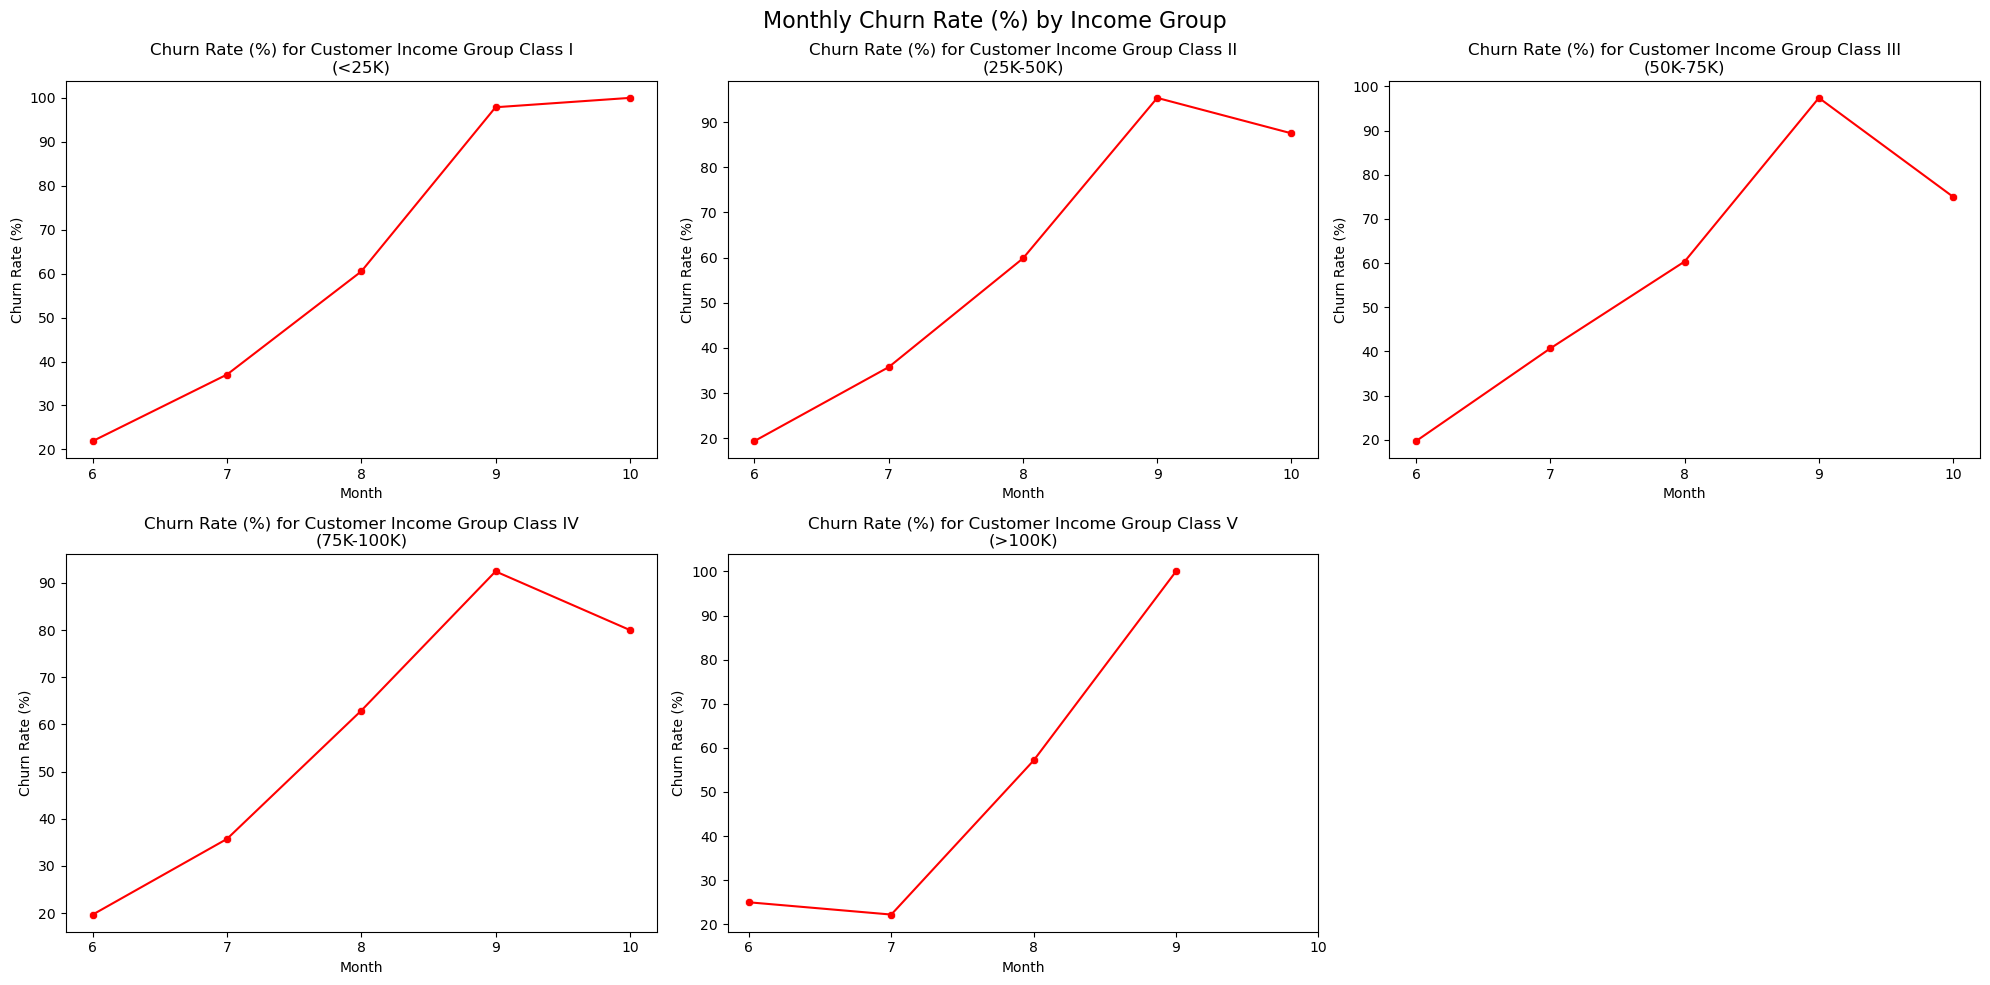

In [141]:
churn_rate_income = calc_churn_rate(df_sales, 'Income Group')

plt.figure(figsize=(20,10))

for kolom in range(len(churn_rate_income.columns)-1):

    plt.subplot(2,3, kolom+1)
    sns.lineplot(data=churn_rate_income,x='Month',y=churn_rate_income.columns[kolom+1],color='red')
    sns.scatterplot(data=churn_rate_income,x='Month',y=churn_rate_income.columns[kolom+1],color='red')
    plt.title(f"Churn Rate (%) for Customer Income Group {churn_rate_income.columns[kolom+1]}")
    plt.xticks(churn_rate_income['Month'])
    plt.ylabel('Churn Rate (%)')

plt.suptitle("Monthly Churn Rate (%) by Income Group", fontsize=16)
plt.tight_layout()
;


### **Churn Rate by Household Members**
    Proses visualisasi dilakukan dengan menggunakan lineplot untuk mempermudah interpretasi trend churn rate tiap bulan nya.

''

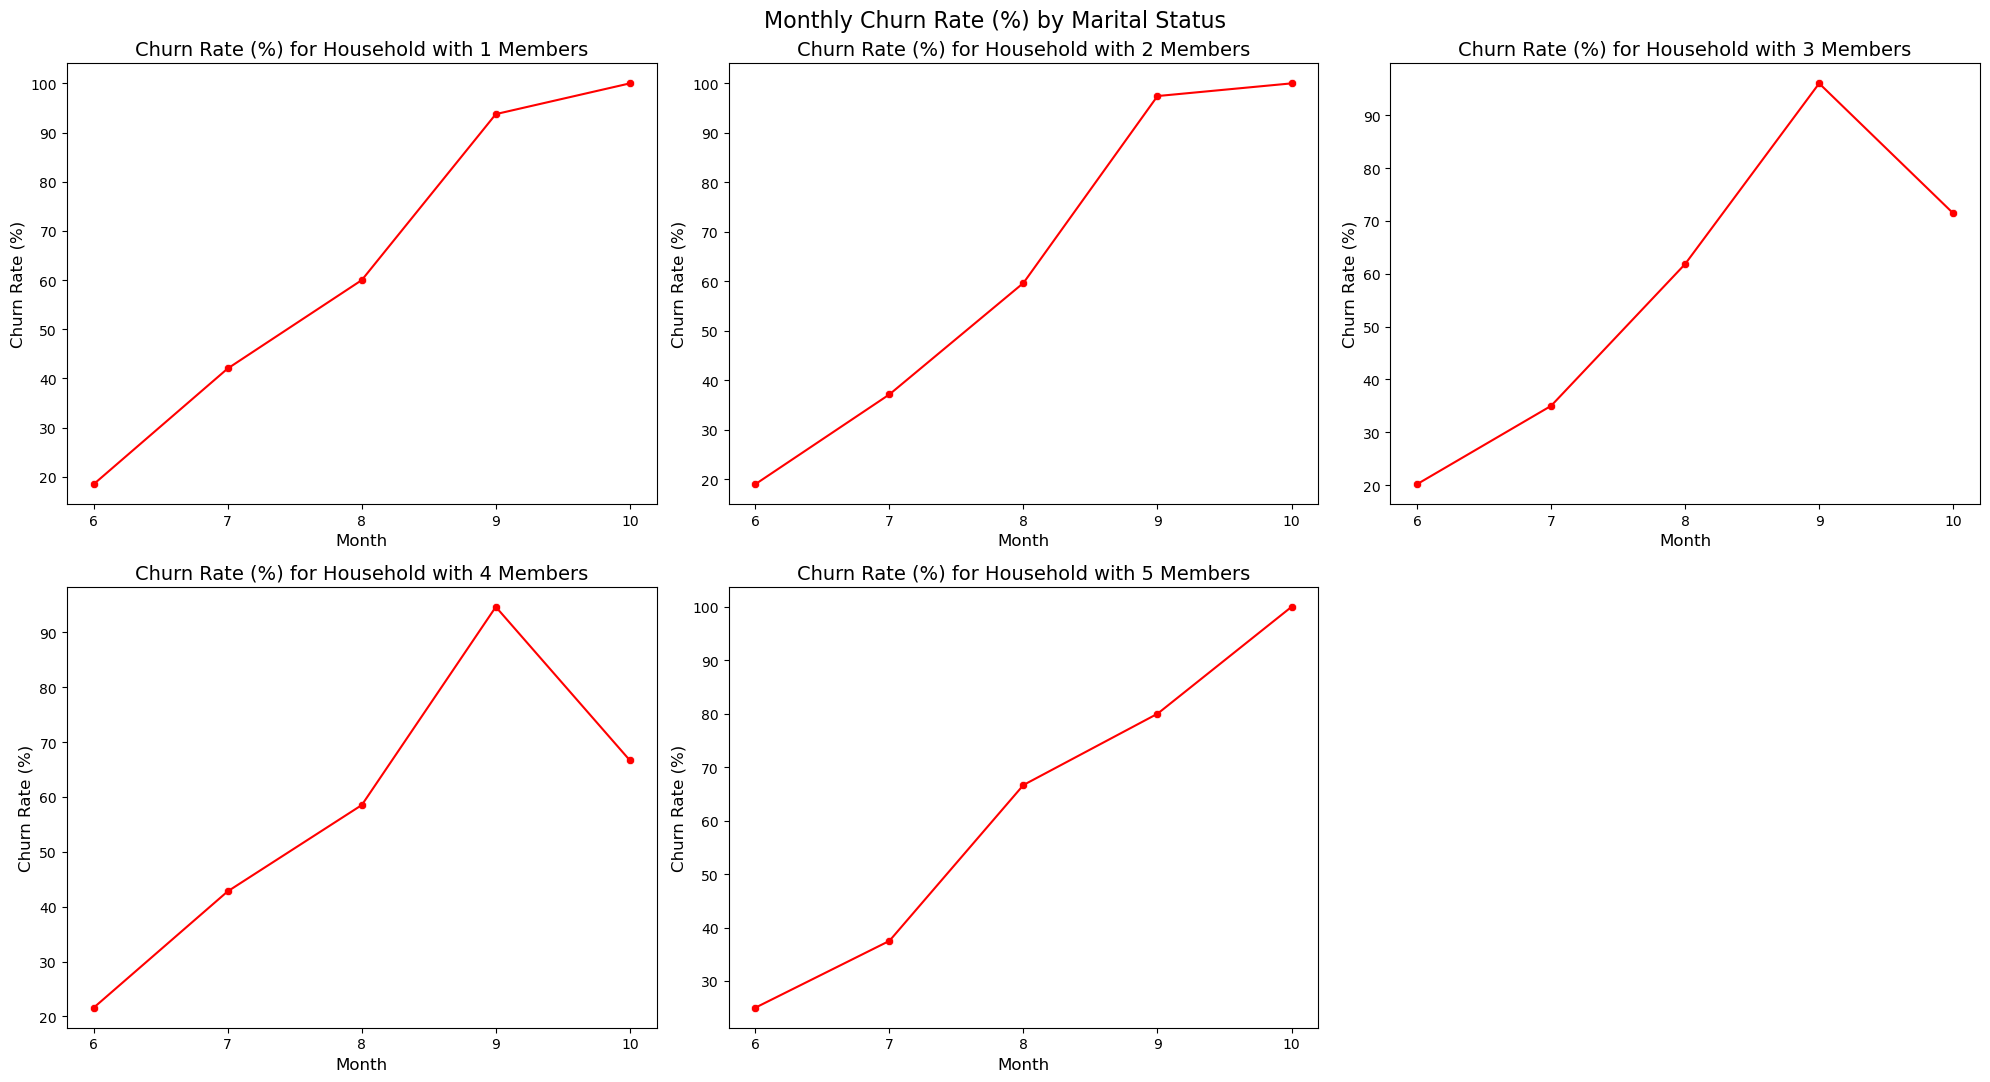

In [142]:
churn_rate_household = calc_churn_rate(df_sales, 'Household Members')

plt.figure(figsize=(20,11))

for kolom in range(len(churn_rate_household.columns)-1):

    plt.subplot(2,3, kolom+1)

    sns.lineplot(data=churn_rate_household,x='Month',y=churn_rate_household.columns[kolom+1],color='red')
    sns.scatterplot(data=churn_rate_household,x='Month',y=churn_rate_household.columns[kolom+1],color='red')

    plt.title(f"Churn Rate (%) for Household with {churn_rate_household.columns[kolom+1]} Members",fontsize=14)

    plt.xticks(churn_rate_household['Month'])
    plt.xlabel('Month',fontsize=12)

    plt.ylabel('Churn Rate (%)',fontsize=12)

plt.suptitle("Monthly Churn Rate (%) by Marital Status", fontsize=16)
plt.tight_layout()
;


### **Churn Rate Summary**

**Berdasarkan Umur**

    1) Customer dengan Churn Rate paling tinggi adalah customer berumur 18-19 tahun, dimana pada periode penelitian, 100% customer pada Age Group ini mengalami churn.
    2) Age Group lain yang juga mengalami 100% Churn tetapi dengan rate yang lebih lambat adalah customer Age Group 20s, 60s, 70s
    3) Customer dengan Churn Rate paling lambat adalah customer Age Group 30s, 40s, 50s, tetapi paling baik di Age Group 30s karena terjadi penurunan rate di bulan terakhir

**Berdasarkan Latar Belakang Pendidikan**

    1) Churn Rate pada customer dengan Education Background Basic dan Master memiliki pola churn yang sama yaitu semakin lama semakin banyak customer yang churn.
    2) Churn Rate pada customer dengan Education Background Graduation dan PhD memiliki pola churn yang sama yaitu meningkat tetapi menurun di bulan terakhir. Penurunan churn rate lebih signifikan pada customer dengan Education Background PhD

**Berdasarkan Income Group**

    1) Churn Rate pada customer Income Group Class I hingga Class 4 memiliki pola churn yang sama yaitu meningkat tetapi menurun di bulan terakhir. Penurunan churn rate lebih signifikan pada customer dengan income Group Class III.
    2) Churn Rate pada customer Income Group Class V memiliki churn rate yang paling cepat, dimana terjadi peningkatan di bulan ke 7 dan customer churn 100 % di bulan ke-9

**Berdasarkan Anggota Keluarga**

    1) Churn Rate pada customer dengan jumlah anggota keluarga 1 hingga 4 memiliki pola churn yang sama yaitu meningkat tetapi menurun di bulan terakhir. Penurunan churn rate lebih signifikan pada customer dengan jumlah customer 3 dan 4.
    2) Churn Rate pada customer dengan jumlah anggota keluarga 5 memiliki pola churn yang terus meningkat (meskipun belum 100% churn)


---
# **Conclusion**

## ***Insights***

    1) Berdasarkan umur, teridentifikasi bahwa jumlah customer yang pernah berbelanja di Supermarket ini didominasi oleh customer dengan umur 30-49 tahun. Padahal, nilai dari Customer Lifetime Value (CLV) customer Age Group ini rendah. Hal ini disebabkan karena customer group ini jarang melakukan repeat order dan memiliki basket size yang rendah. Selain itu Tenure customer berada di range umur ini tergolong rendah, dan Churn Rate nya tinggi. Sebaliknya, customer yang pernah berbelanja di Supermarket dengan umur 50-79 tahun, jumlahnya lebih sedikit tetapi nilai Customer Lifetime Value (CLV) nya tinggi. Hal ini disebabkan karena customer group ini sering melakukan repeat order dan memiliki basket size yang tinggi. 

    2) Berdasarkan income, teridentifikasi bahwa customer Supermarket saat ini didominasi oleh customer dengan income medium dan medium-to-low. Padahal, nilai dari Customer Lifetime Value (CLV) customer ini lebih rendah dibandingkan customer dengan income medium-to-high income. Sama seperti sebelumnya, hal ini disebabkan karena customer dengan gaji lebih tinggi memiliki Tenure yang lebih lama dan Churn Rate lebih rendah. Artinya, customer dengan lower income cenderung tidak membeli banyak produk (basket size rendah) dan jarang repeat order.

    3) Berdasarkan jumlah anggota keluarga, semakin banyak anggota keluarga, semakin rendah nilai Customer Lifetime Value (CLV) nya. Hal ini mungkin disebabkan karena semakin banyak anggota keluarga, maka semakin banyak pula pengeluaran customer tersebut. Sehingga, customer lebih memilih untuk membeli produk yang banyak tetapi dengan diskon yang besar. Hal ini terbukti berdasarkan Discount Utilization Rate, dimana semakin banyak anggota keluarga, semakin banyak juga order yang dibuat dengan diskon. Rendahnya nilai CLV seiring dengan pertambahan jumlah anggota keluarga menunjukkan bahwa saat ini diskon atau promosi yang dijalankan di Supermarket belum cukup menarik customer dengan keluarga besar. Hal ini kemungkinan dapat menyebabkan customer membeli di Supermarket lain untuk mendapatkan deals yang lebih menarik.

    4) Berdasarkan Channel, saat ini penjualan Supermarket mayoritas terjadi melalui Store, dan pada rentang umur tertentu (seperti diatas 70 tahun), penjualan di Catalog juga cukup tinggi. Penjualan di Website juga memiliki persentase yang signifikan pada setiap customer segment. Ketertarikan customer untuk membeli produk di website Supermarket dapat dilihat dari tingginya jumlah visit website khususnya pada customer dengan umur 40 tahunan. Akan tetapi, jumlah customer yang melakukan order masih sangat sedikit (conversion rate rendah). Secara latar belakang pendidikan dan rentang gaji, semakin tinggi latar belakang dan gaji customer, semakin besar conversion rate nya, meskipun visitnya sangat rendah. Artinya, meskipun penjualan dari website memiliki potensi yang besar, saat ini belum dilakukan aktivasi dan promosi yang tepat untuk engage customer baik dari segi promosi produk yang dijual maupun visibility website ini sendiri.

    5) Berdasarkan campaign yang pernah di jalankan di Supermarket, teridentifikasi bahwa sebenarnya ada kecenderungan customer mau melakukan re-purchase di Supermarket. Sebuah campaign dapat menarik 50%-70% customer yang sebelumnya pernah membeli untuk melakukan order lagi. Akan tetapi, persentase customer yang berbelanja saat campaign saat ini masih sangat rendah dibandingkan yang tidak berbelanja. Maka dari itu, diperlukan promosi yang sifatnya targetted dan personalized berdasarkan customer profile dan behavior nya.

## ***Recommendation***

    Berdasarkan tujuan awal yang telah ditetapkan sebelumnya, hasil dari analisa ini akan memberikan beberapa rekomendasi marketing strategy berdasarkan perilaku dan profil konsumen yang telah dianalisa, sehingga dapat meningkatkan penjualan dan ROI.

**Short Term Strategy: Reactive Approach**

**1) Engage Active Customers**

    Saat ini customer dengan CLV paling tinggi adalah customer berumur 50-70 tahun, berlatar belakang pendidikan Graduations & PhD, income Class IV & Class V, dan memiliki jumlah anggota keluarga 2-3 orang. Agar tidak terjadi penurunan profit, maka customer di segment ini perlu di engage dengan cara tetap melakukan aktivitas promosi di channel pilihan mereka (offline Store) dan diskon untuk produk-produk pilihan mereka (Wine dan Meats). 
- Hal lain yang dapat dilakukan adalah dengan melakukan brand collaboration, yaitu membuat exclusive bundle atau products dengan brand lain yang sekiranya juga dibutuhkan oleh customer berumur 50-70 tahun seperti Health and wellness products (supplements, vitamins), Home improvement tools, etc
- Apabila customer tersebut masih memiliki anak kecil dan remaja, maka dapat melakukan kolaborasi dengan brand-brand Education-related products (school supplies, educational toys), Home essentials (household cleaning products), etc

**2) Increase Customer Loyalty**

    Untuk meningkatkan kontribusi penjualan dari customer-customer yang saat ini CLV nya rendah dikarenakan tenure dan basket size rendah, maka perlu dibuatkan campaign yang dapat membuat customer repeat order kembali. Target customer yang dapat di prioritaskan adalah customer yang saat ini jarang melakukan repeat order yaitu customer umur 30-50 tahun di income Class II dan III. Customer pada segmen ini sangat bergantung terhadap diskon. 
- Salah satu diskon yang dapat dijalankan adalah dengan menerapkan diskon beruntun seperti pembelian ke-dua diskon 20%, pembelian ke-tiga diskon 30% dst. 
- Selain itu, dapat juga diterapkan diskon "Welcome Back" yang diberikan khusus kepada customer-customer yang telah berhenti berbelanja selama 3 bulan, sehingga customer tersebut dapat ter re-activate untuk berbelanja di toko Supermarket.

**3) Optimize Digital Performance**

    Melihat adanya ketertarikan untuk penjualan online, maka campaign online diperlukan. Untuk mentrigger pembelian pertama seorang customer, maka dapat dilakukan campaign seperti diskon pembelian pertama di website 50% off. Selain itu, dapat dibuat juga diskon eksklusif yang hanya dapat diperoleh di website pada suatu waktu tertentu. Target customer yang dapat di prioritaskan adalah customer dengan income Class I dan Class II dengan jumlah anggota keluarga yang besar (lebih dari 3). 
- Pada customer dengan income class rendah, sebenarnya preferensi untuk membeli dari website lebih tinggi dari income class lainnya, tetapi conversion rate paling rendah. Artinya, promosi yang ada di website kurang menarik untuk customer tersebut. Maka dapat dilakukan diskon pada produk-produk pilihan customer ini seperti Meat dan Gold.
- Pada customer dengan jumlah anggota keluarga yang besar, pola yang terjadi sama dengan customer dengan income class renda, dimana preferensi membeli produk yang tinggi tetapi conversion rate rendah. Maka dapat dilakukan diskon pada produk pilihan customer ini seperti Wine dan Meat.


**Long Term Strategy: Predictive Approach**

**1) Encourage Larger Transactions**

    Berdasarkan keadaan saat ini, toko Supermarket masih sangat bergantung pada penjualan Wine yang tinggi. Maka dari itu dapat dilakukan cross-bundling dengan produk-produk lainnya sehingga selain meningkatkan basket size customer, hal ini juga dapat meningkatkan kontribusi penjualan dari produk lainnya. Target customer yang dapat diprioritaskan untuk marketing activity ini adalah customer dengan jumlah anggota keluarga lebih dari 3 (keluarga besar)
- Customer dengan profil ini sekarang memiliki nilai CLV yang rendah tetapi memiliki potensial yang besar dalam bisnis. Saat ini ada kemungkinan customer dengan profil seperti ini membeli produk di toko lain, maka untuk tetap bisa bertumbuh dan bersaing, Supermarket harus bisa menarik customer-customer baru. Apabila mengandalkan customer tanpa tanggungan, suatu saat customer ini akan menjadi keluarga juga, dan akan berhenti berbelanja di Supermarket. Memang betul akan ada customer-customer baru lainnya, akan pengurangan jumlah customer tetap akan mempengaruhi pertumbuhan bisnis.
- Karena customer dengan profil ini biasanya sangat bergantung pada diskon, maka dapat diterapkan diskon beli banyak lebih murah, sehingga customer merasakan added value (selain bisa membeli produk untuk dirinya, bisa juga untuk keluarga nya).

**2) Enter Premium Market**
    
    Saat ini, Customer Lifetime Value customer dengan profil income Class IV sangat tinggi dan Tenure custome dengan profil income Class V juga paling tinggi. Akan tetapi, jumlah customer yang pernah membeli dari Supermarket dengan profil ini sangat sedikit dibandingkan dengan profil income class lainnya. Artinya, saat ini Supermarket hanya mengandalkan penjualan di segment medium-to-low. Padahal, potensial market premium sangat tinggi. Dapat terlihat bahwa produk-produk dengan price point yang cukup tinggi seperti Gold memiliki penjualan yang sangat rendah. Maka dari itu, beberapa hal yang dapat dilakukan untuk memasuki market premium adalah:
- Melakukan bundling produk yang sering dibeli oleh customer segment premium seperti Meat dengan produk premium lainnya seperti Gold.
- Berdasarkan data teridentifikasi bahwa semakin besar gaji customer, maka kecenderungan memilih Catalog sebagai channel pembelian semakin tinggi. Artinya, customer pada segment premium cenderung lebih tertarik terhadap direct / personal approach. Maka dari itu, bisa dilakukan aktivitas marketing seperti door-to-door approach atau community approach. 
- Customer pada segment ini tidak terlalu memperdulikan diskon, maka hal yang perlu dipastikan ketika melakukan aktivitas penawaran produk adalah kualitas produk yang ditawarkan. 
